<a href="https://colab.research.google.com/github/Lay-ke/Data-mining/blob/main/analysis/rebuilt_aidev_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Rebuilt & Matured AIDev-pop Analysis


## Table of Contents

1. Setup
2. Data Loading
3. Patch Parsing
4. Schema Checks
5. EDA
6. Developer Follow-ups
7. Ecosystem Analysis
8. Visuals
9. Edge Cases
10. Conclusions


## AIDev dataset

## Setup

*Inserted header to group related content.*

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats

all_pr_df = pd.read_parquet("hf://datasets/hao-li/AIDev/all_pull_request.parquet")
all_repo_df = pd.read_parquet("hf://datasets/hao-li/AIDev/all_repository.parquet")
all_user_df = pd.read_parquet("hf://datasets/hao-li/AIDev/all_user.parquet")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [2]:
all_pr_df

,id,number,title,body,agent,user_id,user,state,created_at,closed_at,merged_at,repo_id,repo_url,html_url
0,3264016139,1688,`metta code` --> `metta clip` and additional p...,Remove unused `root_key` variable to fix ruff ...,Claude_Code,37011,jacklionheart,closed,2025-07-25T18:15:36Z,2025-07-25T19:17:23Z,2025-07-25T19:17:23Z,8.439884e+08,https://api.github.com/repos/Metta-AI/metta,https://github.com/Metta-AI/metta/pull/1688
1,3264021033,41,feat: Comprehensive ruff error resolution with...,## 🎯 Mission Accomplished: 100% Ruff Error Res...,Claude_Code,131842369,Draco3310,open,2025-07-25T18:17:57Z,None,None,9.920635e+08,https://api.github.com/repos/Draco3310/Gal-Fri...,https://github.com/Draco3310/Gal-Friday2/pull/41
2,3264042289,1600,Add Evals frontend implementation plan and HTM...,\nCreate comprehensive implementation plan for...,Claude_Code,6766889,justicart,closed,2025-07-25T18:26:15Z,2025-07-25T23:19:14Z,None,9.267118e+08,https://api.github.com/repos/bolt-foundry/bolt...,https://github.com/bolt-foundry/bolt-foundry/p...
3,3264042318,1601,Add 4 new BfDs components for Evals interface ...,\nPhase 1 component creation for the Evals fro...,Claude_Code,6766889,justicart,closed,2025-07-25T18:26:16Z,2025-07-25T23:19:11Z,None,9.267118e+08,https://api.github.com/repos/bolt-foundry/bolt...,https://github.com/bolt-foundry/bolt-foundry/p...
4,3264067496,3,🚀 Complete Frontend-Backend API Integration wi...,## 🎯 Summary\n\nThis PR completes the **fronte...,Claude_Code,42357482,twitchyvr,closed,2025-07-25T18:39:14Z,2025-07-25T18:48:47Z,2025-07-25T18:48:47Z,1.025871e+09,https://api.github.com/repos/twitchyvr/Spaghetti,https://github.com/twitchyvr/Spaghetti/pull/3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932786,2858495710,79,chore: update RPC endpoint and build target,# Update RPC Endpoint and Build Target\n\nUpda...,Devin,158243242,devin-ai-integration[bot],closed,2025-02-17T17:53:32Z,2025-02-17T17:54:19Z,2025-02-17T17:54:19Z,9.274854e+08,https://api.github.com/repos/xiayuhkust/TuraWAP,https://github.com/xiayuhkust/TuraWAP/pull/79
932787,2858498986,6,feat: enhance recruitment management system wi...,# Enhanced Recruitment Management System\n\nTh...,Devin,158243242,devin-ai-integration[bot],closed,2025-02-17T17:55:34Z,2025-02-18T02:19:26Z,2025-02-18T02:19:26Z,9.334548e+08,https://api.github.com/repos/crb12546/musical-...,https://github.com/crb12546/musical-memory/pull/6
932788,2858525953,80,fix: revert to PR #73 OpenAI config with updat...,# Revert to PR #73 with Updated RPC Endpoint\n...,Devin,158243242,devin-ai-integration[bot],closed,2025-02-17T18:10:27Z,2025-02-17T18:13:05Z,2025-02-17T18:13:05Z,9.274854e+08,https://api.github.com/repos/xiayuhkust/TuraWAP,https://github.com/xiayuhkust/TuraWAP/pull/80
932789,2858527610,400,Add Doxygen Documentation for Public APIs,# Add Doxygen Documentation for Public APIs\n\...,Devin,158243242,devin-ai-integration[bot],closed,2025-02-17T18:11:27Z,2025-02-22T01:15:27Z,None,1.195796e+08,https://api.github.com/repos/wolfSSL/wolfTPM,https://github.com/wolfSSL/wolfTPM/pull/400


In [3]:
# all_repo_df

In [4]:
# all_user_df

## AIDev-pop (repositories that have more than 100 stars)

In [5]:
# Basic
pr_df = pd.read_parquet("hf://datasets/hao-li/AIDev/pull_request.parquet")
repo_df = pd.read_parquet("hf://datasets/hao-li/AIDev/repository.parquet")
user_df = pd.read_parquet("hf://datasets/hao-li/AIDev/user.parquet")

# Comments and reviews
pr_comments_df = pd.read_parquet("hf://datasets/hao-li/AIDev/pr_comments.parquet")
pr_reviews_df = pd.read_parquet("hf://datasets/hao-li/AIDev/pr_reviews.parquet")
pr_review_comments_df = pd.read_parquet("hf://datasets/hao-li/AIDev/pr_review_comments_v2.parquet")

# Commits
pr_commits_df = pd.read_parquet("hf://datasets/hao-li/AIDev/pr_commits.parquet")
pr_commit_details_df = pd.read_parquet("hf://datasets/hao-li/AIDev/pr_commit_details.parquet")

# Related issues
related_issue_df = pd.read_parquet("hf://datasets/hao-li/AIDev/related_issue.parquet")
issue_df = pd.read_parquet("hf://datasets/hao-li/AIDev/issue.parquet")

# Events
pr_timeline_df = pd.read_parquet("hf://datasets/hao-li/AIDev/pr_timeline.parquet")

# Task type
pr_task_type_df = pd.read_parquet("hf://datasets/hao-li/AIDev/pr_task_type.parquet")

# Human-PR
human_pr_df = pd.read_parquet("hf://datasets/hao-li/AIDev/human_pull_request.parquet")
human_pr_task_type_df = pd.read_parquet("hf://datasets/hao-li/AIDev/human_pr_task_type.parquet")

## Developer Follow-ups

*Inserted header to group related content.*

In [6]:
print(f"len(pr_df): {len(pr_df)}")
print(f"len(repo_df): {len(repo_df)}")
print(f"len(user_df): {len(user_df)}")

print(f"len(pr_comments_df): {len(pr_comments_df)}")
print(f"len(pr_reviews_df): {len(pr_reviews_df)}")
print(f"len(pr_review_comments_df): {len(pr_review_comments_df)}")

print(f"len(pr_commits_df): {len(pr_commits_df)}")
print(f"len(pr_commit_details_df): {len(pr_commit_details_df)}")


print(f"len(related_issue_df): {len(related_issue_df)}")
print(f"len(issue_df): {len(issue_df)}")

print(f"len(pr_timeline_df): {len(pr_timeline_df)}")

print(f"len(pr_task_type_df): {len(pr_task_type_df)}")

print(f"len(human_pr_df): {len(human_pr_df)}")
print(f"len(human_pr_task_type_df): {len(human_pr_task_type_df)}")

len(pr_df): 33596
len(repo_df): 2807
len(user_df): 1796
len(pr_comments_df): 39122
len(pr_reviews_df): 28875
len(pr_review_comments_df): 26868
len(pr_commits_df): 88576
len(pr_commit_details_df): 711923
len(related_issue_df): 4923
len(issue_df): 4614
len(pr_timeline_df): 325500
len(pr_task_type_df): 33596
len(human_pr_df): 6618
len(human_pr_task_type_df): 6618


## Patch Parsing

*Inserted header to group related content.*

### Extract patches from merged Agentic-PRs

In [7]:
merged_pr_mask = ~pr_df['merged_at'].isna()
merged_pr_ids = pr_df[merged_pr_mask]['id']
patch_mask = pr_commit_details_df['pr_id'].isin(merged_pr_ids)
pr_commit_details_df[patch_mask]['patch'].dropna()

,patch
0,"@@ -0,0 +1,38 @@\n+name: Compile llms.txt\n+\n..."
1,"@@ -0,0 +1,47 @@\n+import os\n+from pathlib im..."
3,"@@ -1,47 +1,48 @@\n import os\n from pathlib i..."
4,"@@ -3,45 +3,60 @@\n \n \n def compile_llms_txt..."
6,"@@ -1,29 +1,34 @@\n-import os\n from pathlib i..."
...,...
711885,"@@ -2,6 +2,7 @@\n \n Servers focused on static..."
711918,"@@ -0,0 +1,53 @@\n+# numbagg Development Guide..."
711919,"@@ -49,5 +49,5 @@ uv run pytest numbagg/test/t..."
711920,"@@ -339,7 +339,7 @@\n ..."


In [8]:
pr_commit_details_df['is_na'] = pr_commit_details_df['patch'].isna()
merged = pd.merge(pr_commit_details_df, all_pr_df[['id', 'agent']], left_on='pr_id', right_on='id')
merged.groupby('agent').apply(lambda x: x['is_na'].value_counts())

/tmp/ipython-input-2143530944.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  merged.groupby('agent').apply(lambda x: x['is_na'].value_counts())


is_na,False,True
agent,,
Claude_Code,20749,2547
Copilot,154744,32503
Cursor,35162,2676
Devin,152064,17403
OpenAI_Codex,279002,15073


### Check PR type

## EDA

*Inserted header to group related content.*

In [9]:
pr_task_type_df['type'].value_counts()

,count
type,
feat,14450
fix,8106
docs,3887
test,2356
refactor,2288
chore,896
build,627
ci,411
perf,340


## Verifying data integrity

In [10]:
pr_df.head()

,id,number,title,body,agent,user_id,user,state,created_at,closed_at,merged_at,repo_id,repo_url,html_url
0,3264933329,2911,Fix: Wait for all partitions in load_collectio...,## Summary\n\nFixes an issue where `load_colle...,Claude_Code,108661493,weiliu1031,closed,2025-07-26T02:59:01Z,2025-07-29T07:01:20Z,None,191751505,https://api.github.com/repos/milvus-io/pymilvus,https://github.com/milvus-io/pymilvus/pull/2911
1,3265118634,2,ファイルパス参照を相対パスに統一し、doc/からdocs/に統一,## 背景\n\n現在、本プロジェクトにおいて以下のパス構成の不整合が生じています：\n\n...,Claude_Code,61827001,cm-kojimat,closed,2025-07-26T04:56:55Z,2025-07-26T22:12:24Z,2025-07-26T22:12:24Z,1025472321,https://api.github.com/repos/classmethod/tsumiki,https://github.com/classmethod/tsumiki/pull/2
2,3265640341,30,Add build staleness detection for debug CLI,## Summary\r\n\r\n Implements comprehensive b...,Claude_Code,7475,MSch,closed,2025-07-26T13:31:19Z,2025-07-26T13:37:22Z,2025-07-26T13:37:22Z,988488798,https://api.github.com/repos/steipete/Peekaboo,https://github.com/steipete/Peekaboo/pull/30
3,3265709660,205,feat: add comprehensive README screenshots wit...,## Type of Change\n\n- [ ] 🐛 `bug` - Bug fix (...,Claude_Code,80381,sugyan,closed,2025-07-26T14:07:22Z,2025-07-26T14:45:30Z,2025-07-26T14:45:30Z,999285986,https://api.github.com/repos/sugyan/claude-cod...,https://github.com/sugyan/claude-code-webui/pu...
4,3265782173,17625,chore: remove HashedPostStateProvider trait,## Summary\r\n\r\n#17545 \r\n\r\nRemove the un...,Claude_Code,47593288,adust09,open,2025-07-26T15:02:48Z,None,None,537233603,https://api.github.com/repos/paradigmxyz/reth,https://github.com/paradigmxyz/reth/pull/17625


In [11]:
repo_df.head()

,id,url,license,full_name,language,forks,stars
0,966235850,https://api.github.com/repos/kizuna-ai-lab/sokuji,AGPL-3.0,kizuna-ai-lab/sokuji,TypeScript,11,254
1,386644013,https://api.github.com/repos/freenet/freenet-core,NOASSERTION,freenet/freenet-core,Rust,94,2391
2,977155585,https://api.github.com/repos/coleam00/mcp-craw...,MIT,coleam00/mcp-crawl4ai-rag,Python,474,1447
3,528194129,https://api.github.com/repos/vexxhost/atmosphere,None,vexxhost/atmosphere,Smarty,34,142
4,703998226,https://api.github.com/repos/JonasKruckenberg/k23,Apache-2.0,JonasKruckenberg/k23,Rust,32,515


In [12]:
pr_commit_details_df.head()

,sha,pr_id,author,committer,message,commit_stats_total,commit_stats_additions,commit_stats_deletions,filename,status,additions,deletions,changes,patch,is_na
0,2f9d54dda4f0c87c19e0bbeb9936f525d0587e16,3271196926,devin-ai-integration[bot],devin-ai-integration[bot],Add llms.txt compilation system for AI model d...,23008,23008,0,.github/workflows/compile-llms-txt.yml,added,38.0,0.0,38.0,"@@ -0,0 +1,38 @@\n+name: Compile llms.txt\n+\n...",False
1,2f9d54dda4f0c87c19e0bbeb9936f525d0587e16,3271196926,devin-ai-integration[bot],devin-ai-integration[bot],Add llms.txt compilation system for AI model d...,23008,23008,0,docs/compile_llms_txt.py,added,47.0,0.0,47.0,"@@ -0,0 +1,47 @@\n+import os\n+from pathlib im...",False
2,2f9d54dda4f0c87c19e0bbeb9936f525d0587e16,3271196926,devin-ai-integration[bot],devin-ai-integration[bot],Add llms.txt compilation system for AI model d...,23008,23008,0,llms.txt,added,22923.0,0.0,22923.0,None,True
3,dbd1b5f129f7cffa5ce284d7255814c98bcc38a2,3271196926,devin-ai-integration[bot],devin-ai-integration[bot],Fix lint issues: remove unused variable and ap...,35,18,17,docs/compile_llms_txt.py,modified,18.0,17.0,35.0,"@@ -1,47 +1,48 @@\n import os\n from pathlib i...",False
4,c2659cfdedf666c8f14753d71664563c2a932b23,3271196926,devin-ai-integration[bot],devin-ai-integration[bot],Update llms.txt to follow official standard wi...,23035,89,22946,docs/compile_llms_txt.py,modified,51.0,36.0,87.0,"@@ -3,45 +3,60 @@\n \n \n def compile_llms_txt...",False


In [13]:
pr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33596 entries, 0 to 33595
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          33596 non-null  int64 
 1   number      33596 non-null  int64 
 2   title       33596 non-null  object
 3   body        33236 non-null  object
 4   agent       33596 non-null  object
 5   user_id     33596 non-null  int64 
 6   user        33596 non-null  object
 7   state       33596 non-null  object
 8   created_at  33596 non-null  object
 9   closed_at   31284 non-null  object
 10  merged_at   24014 non-null  object
 11  repo_id     33596 non-null  int64 
 12  repo_url    33596 non-null  object
 13  html_url    33596 non-null  object
dtypes: int64(4), object(10)
memory usage: 3.6+ MB


In [14]:
repo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2807 entries, 0 to 2806
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         2807 non-null   int64 
 1   url        2807 non-null   object
 2   license    2616 non-null   object
 3   full_name  2807 non-null   object
 4   language   2770 non-null   object
 5   forks      2807 non-null   int64 
 6   stars      2807 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 153.6+ KB


In [15]:
pr_review_comments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26868 entries, 0 to 26867
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      26868 non-null  int64  
 1   pull_request_review_id  26868 non-null  int64  
 2   user                    26868 non-null  object 
 3   user_type               26868 non-null  object 
 4   diff_hunk               26004 non-null  object 
 5   path                    26868 non-null  object 
 6   position                13053 non-null  float64
 7   original_position       26868 non-null  int64  
 8   commit_id               26868 non-null  object 
 9   original_commit_id      26868 non-null  object 
 10  body                    26867 non-null  object 
 11  pull_request_url        26868 non-null  object 
 12  created_at              26868 non-null  object 
 13  updated_at              26868 non-null  object 
 14  in_reply_to_id          8904 non-null 

## Data Exploration

## Setup

*Inserted header to group related content.*

In [16]:
# Agents and their PR counts
print("\nPR count by Agent:")
print(pr_df['agent'].value_counts())

# Repo languages distribution (top 10)
print("\nTop 10 Languages:")
print(repo_df['language'].value_counts().head(10))

# Merge state info to see success rates
print("\nPR states distribution:")
print(pr_df['state'].value_counts())

# Summary stats for stars/forks (helps validate AIDev-pop subset)
print("\nRepository popularity summary:")
print(repo_df[['stars', 'forks']].describe())


PR count by Agent:
agent
OpenAI_Codex    21799
Copilot          4970
Devin            4827
Cursor           1541
Claude_Code       459
Name: count, dtype: int64

Top 10 Languages:
language
TypeScript    650
Python        530
Go            242
C#            220
JavaScript    190
Rust          159
C++           119
Java           86
PHP            69
C              61
Name: count, dtype: int64

PR states distribution:
state
closed    31284
open       2312
Name: count, dtype: int64

Repository popularity summary:
               stars         forks
count    2807.000000   2807.000000
mean     4273.754898    750.350552
std     12634.833284   3135.612809
min       101.000000      1.000000
25%       215.500000     36.000000
50%       564.000000    104.000000
75%      2487.500000    399.500000
max    203424.000000  62633.000000


## Joining PR with repository data

In [17]:
# --- Merge PRs with repository metadata ---
pr_repo_df = pr_df.merge(
    repo_df[['id', 'language', 'stars', 'forks', 'full_name']],
    left_on='repo_id', right_on='id', suffixes=('', '_repo')
)

# Drop duplicate 'id_repo' and rename for clarity
pr_repo_df = pr_repo_df.rename(columns={'id_repo': 'repo_table_id'})



# Basic counts per language (PR-level)
lang_counts = pr_repo_df['language'].value_counts().head(10)
print("\nPR count by top languages:")
print(lang_counts)


# Check merged result
pr_repo_df.head()


PR count by top languages:
language
Go            10108
Python         7191
TypeScript     6503
C#             1985
Java           1278
Rust           1079
JavaScript      987
HTML            755
Ruby            468
C++             422
Name: count, dtype: int64


,id,number,title,body,agent,user_id,user,state,created_at,closed_at,merged_at,repo_id,repo_url,html_url,repo_table_id,language,stars,forks,full_name
0,3264933329,2911,Fix: Wait for all partitions in load_collectio...,## Summary\n\nFixes an issue where `load_colle...,Claude_Code,108661493,weiliu1031,closed,2025-07-26T02:59:01Z,2025-07-29T07:01:20Z,None,191751505,https://api.github.com/repos/milvus-io/pymilvus,https://github.com/milvus-io/pymilvus/pull/2911,191751505,Python,1230,368,milvus-io/pymilvus
1,3265118634,2,ファイルパス参照を相対パスに統一し、doc/からdocs/に統一,## 背景\n\n現在、本プロジェクトにおいて以下のパス構成の不整合が生じています：\n\n...,Claude_Code,61827001,cm-kojimat,closed,2025-07-26T04:56:55Z,2025-07-26T22:12:24Z,2025-07-26T22:12:24Z,1025472321,https://api.github.com/repos/classmethod/tsumiki,https://github.com/classmethod/tsumiki/pull/2,1025472321,TypeScript,391,21,classmethod/tsumiki
2,3265640341,30,Add build staleness detection for debug CLI,## Summary\r\n\r\n Implements comprehensive b...,Claude_Code,7475,MSch,closed,2025-07-26T13:31:19Z,2025-07-26T13:37:22Z,2025-07-26T13:37:22Z,988488798,https://api.github.com/repos/steipete/Peekaboo,https://github.com/steipete/Peekaboo/pull/30,988488798,Swift,505,19,steipete/Peekaboo
3,3265709660,205,feat: add comprehensive README screenshots wit...,## Type of Change\n\n- [ ] 🐛 `bug` - Bug fix (...,Claude_Code,80381,sugyan,closed,2025-07-26T14:07:22Z,2025-07-26T14:45:30Z,2025-07-26T14:45:30Z,999285986,https://api.github.com/repos/sugyan/claude-cod...,https://github.com/sugyan/claude-code-webui/pu...,999285986,TypeScript,367,90,sugyan/claude-code-webui
4,3265782173,17625,chore: remove HashedPostStateProvider trait,## Summary\r\n\r\n#17545 \r\n\r\nRemove the un...,Claude_Code,47593288,adust09,open,2025-07-26T15:02:48Z,None,None,537233603,https://api.github.com/repos/paradigmxyz/reth,https://github.com/paradigmxyz/reth/pull/17625,537233603,Rust,4835,1746,paradigmxyz/reth


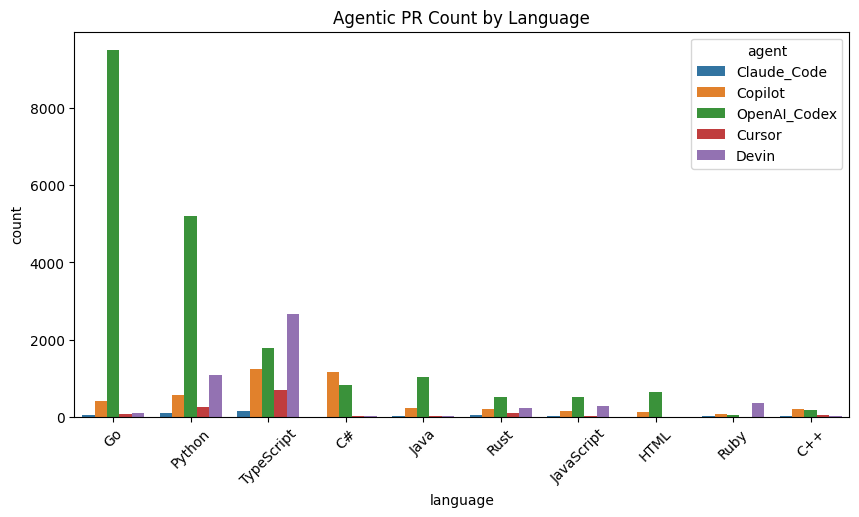

In [18]:
# visualize distribution by agent and language
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.countplot(data=pr_repo_df, x='language', hue='agent', order=lang_counts.index)
plt.title('Agentic PR Count by Language')
plt.xticks(rotation=45)
plt.show()

## Ecosystem Analysis

*Inserted header to group related content.*

In [19]:
# Merge commit details with PR + Repo info
merged_df = pr_commit_details_df.merge(
    pr_repo_df[['id', 'agent', 'language', 'stars']],
    left_on='pr_id', right_on='id',
    suffixes=('_commit', '_pr')
)

# Rename 'id' from the PR table to something clear
merged_df = merged_df.rename(columns={'id': 'pr_table_id'})

# Quick check
merged_df[['pr_id', 'agent', 'language', 'filename', 'additions', 'deletions']].head()

,pr_id,agent,language,filename,additions,deletions
0,3271196926,Devin,Python,.github/workflows/compile-llms-txt.yml,38.0,0.0
1,3271196926,Devin,Python,docs/compile_llms_txt.py,47.0,0.0
2,3271196926,Devin,Python,llms.txt,22923.0,0.0
3,3271196926,Devin,Python,docs/compile_llms_txt.py,18.0,17.0
4,3271196926,Devin,Python,docs/compile_llms_txt.py,51.0,36.0


## Patch Parsing

*Inserted header to group related content.*

In [20]:
# Detect test files
merged_df['is_test_file'] = merged_df['filename'].str.contains(
    'test', case=False, na=False
)

# Count how many files are identified as test files
test_file_ratio = merged_df['is_test_file'].mean()
print(f"Approx. {test_file_ratio*100:.2f}% of files are test-related.")


Approx. 33.72% of files are test-related.


In [21]:
# Aggregate churn per PR by test/non-test
churn_by_pr = (
    merged_df.groupby(['pr_id', 'agent', 'language', 'is_test_file'])
    [['additions', 'deletions']]
    .sum()
    .reset_index()
)

# Pivot to get separate columns for test vs non-test
churn_pivot = churn_by_pr.pivot_table(
    index=['pr_id', 'agent', 'language'],
    columns='is_test_file',
    values=['additions', 'deletions'],
    fill_value=0
)

# Flatten column MultiIndex
churn_pivot.columns = [f"{col[0]}_{'test' if col[1] else 'code'}" for col in churn_pivot.columns]
churn_pivot = churn_pivot.reset_index()

# Compute test-to-code churn ratio
churn_pivot['test_to_code_churn_ratio'] = (
    (churn_pivot['additions_test'] + churn_pivot['deletions_test']) /
    (churn_pivot['additions_code'] + churn_pivot['deletions_code'] + 1e-5)
)

# Inspect sample
print(churn_pivot.head())


        pr_id  agent    language  additions_code  additions_test  \
0  2756921963  Devin      Python           234.0           614.0   
1  2757103560  Devin  TypeScript           397.0           120.0   
2  2757124156  Devin  TypeScript             1.0             0.0   
3  2757125491  Devin  TypeScript             1.0             0.0   
4  2757179026  Devin  TypeScript            12.0          1621.0   

   deletions_code  deletions_test  test_to_code_churn_ratio  
0           197.0           147.0                  1.765661  
1           257.0             5.0                  0.191131  
2             1.0             0.0                  0.000000  
3             1.0             0.0                  0.000000  
4             6.0           163.0                 99.111056  


## Setup

*Inserted header to group related content.*

In [22]:
ecosystem_summary = (
    churn_pivot.groupby(['language', 'agent'])['test_to_code_churn_ratio']
    .mean()
    .reset_index()
    .sort_values(by='test_to_code_churn_ratio', ascending=False)
)

ecosystem_summary.head(10)


,language,agent,test_to_code_churn_ratio
13,C,Devin,3.247303e+07
120,Objective-C,OpenAI_Codex,2.240000e+07
58,Go,OpenAI_Codex,2.155345e+07
47,Emacs Lisp,Copilot,1.660000e+07
21,C++,Copilot,1.078959e+07
167,Solidity,Devin,9.589286e+06
20,C++,Claude_Code,9.430000e+06
155,Scala,Copilot,6.376929e+06
189,Vue,OpenAI_Codex,4.947369e+06
91,Kotlin,Copilot,3.466131e+06


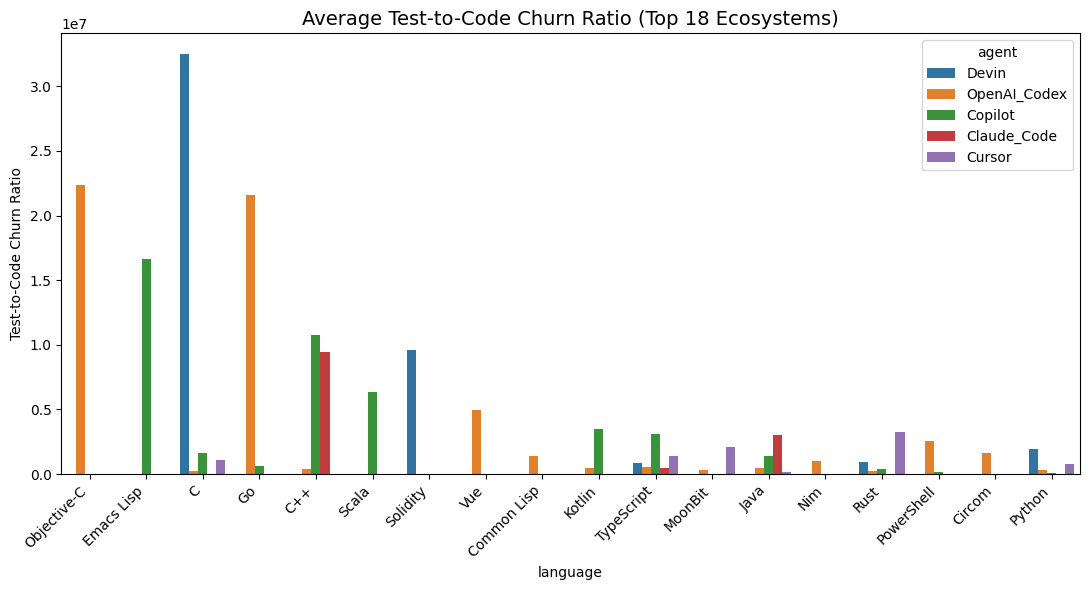

In [23]:
# Focus on the most churn-heavy ecosystems to declutter the axis
top_n = 18
top_langs = (
    ecosystem_summary.groupby('language')['test_to_code_churn_ratio']
    .mean()
    .nlargest(top_n)
    .index
)

filtered_summary = ecosystem_summary[ecosystem_summary['language'].isin(top_langs)]

plt.figure(figsize=(11, 6))
sns.barplot(
    data=filtered_summary,
    x='language', y='test_to_code_churn_ratio', hue='agent',
    order=top_langs
)
plt.title(f'Average Test-to-Code Churn Ratio (Top {top_n} Ecosystems)', fontsize=14)
plt.ylabel('Test-to-Code Churn Ratio')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [24]:
# --- Step 7: Refine Churn Analysis (using correct tables) ---

# 1️⃣ Filter merged PRs from pr_df
merged_pr_ids = pr_df[pr_df['merged_at'].notnull()]['id']

# 2️⃣ Keep only those PRs in churn_pivot (which has the test_to_code_churn_ratio)
merged_churn = churn_pivot[churn_pivot['pr_id'].isin(merged_pr_ids)].copy()

# 3️⃣ Compute file counts from commit details
files_per_pr = (
    pr_commit_details_df.groupby('pr_id')['filename']
    .nunique()
    .reset_index(name='file_count')
)

# 4️⃣ Merge file counts into merged_churn
merged_churn = merged_churn.merge(files_per_pr, on='pr_id', how='left')

# 5️⃣ Normalize the churn ratio by file count
merged_churn['normalized_test_to_code_churn'] = (
    merged_churn['test_to_code_churn_ratio'] / merged_churn['file_count']
).replace([float('inf'), -float('inf')], 0).fillna(0)

# 6️⃣ Quick sanity check
print(merged_churn[['pr_id', 'agent', 'language',
                    'test_to_code_churn_ratio',
                    'normalized_test_to_code_churn',
                    'file_count']].head())

# 7️⃣ Optional summary statistics
summary = merged_churn.groupby('agent')['normalized_test_to_code_churn'].describe()
print(summary)


        pr_id  agent    language  test_to_code_churn_ratio  \
0  2757674020  Devin  TypeScript                   0.01218   
1  2758172742  Devin  TypeScript                   0.00000   
2  2758215458  Devin    Solidity                   0.00000   
3  2758578416  Devin  TypeScript                   0.00000   
4  2758595312  Devin  TypeScript                   0.00000   

   normalized_test_to_code_churn  file_count  
0                        0.00087          14  
1                        0.00000           6  
2                        0.00000          10  
3                        0.00000           4  
4                        0.00000           7  
                count          mean           std  min  25%       50%  \
agent                                                                   
Claude_Code     270.0  2.653709e+05  2.380066e+06  0.0  0.0  0.000170   
Copilot        2041.0  9.751413e+05  2.472775e+07  0.0  0.0  0.000378   
Cursor         1005.0  2.979866e+05  3.613369e+06  0.

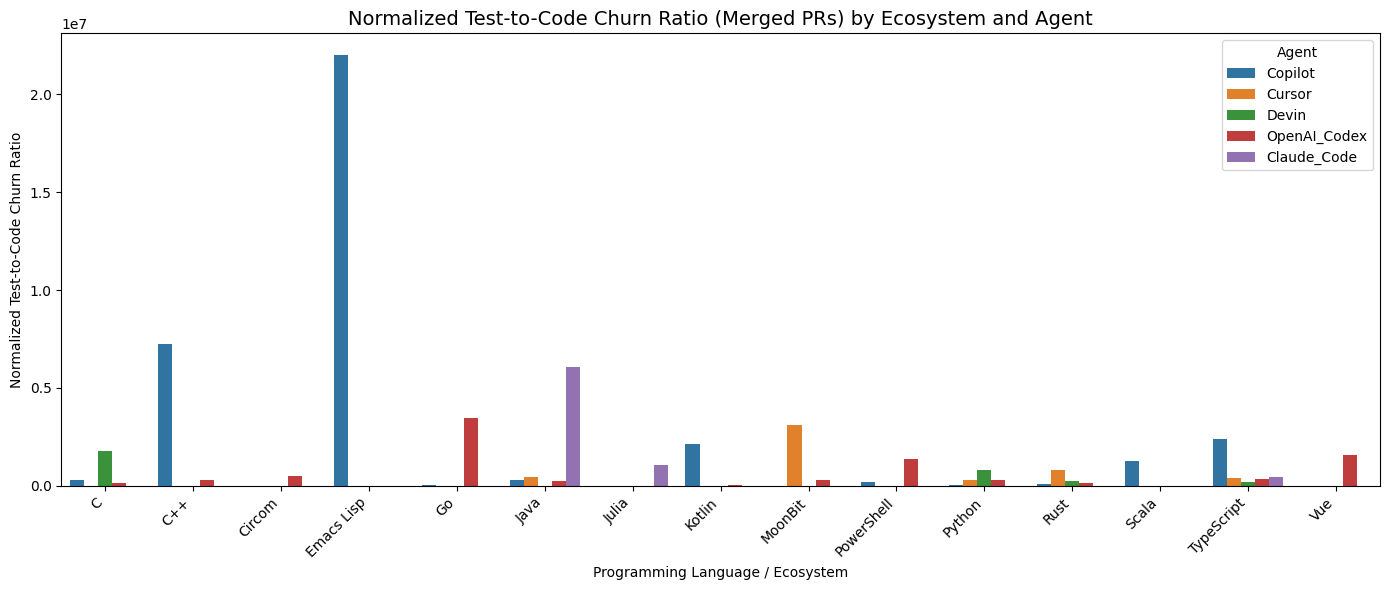

In [25]:
# Group and aggregate normalized churn
avg_norm_churn = (
    merged_churn.groupby(['language', 'agent'])['normalized_test_to_code_churn']
    .mean()
    .reset_index()
)

# Sort languages by average churn
top_langs = (
    avg_norm_churn.groupby('language')['normalized_test_to_code_churn']
    .mean()
    .sort_values(ascending=False)
    .head(15)
    .index
)

avg_norm_churn_top = avg_norm_churn[avg_norm_churn['language'].isin(top_langs)]

# Plot: Normalized Test-to-Code Churn by Agent and Language
plt.figure(figsize=(14, 6))
sns.barplot(
    data=avg_norm_churn_top,
    x='language', y='normalized_test_to_code_churn',
    hue='agent'
)
plt.title('Normalized Test-to-Code Churn Ratio (Merged PRs) by Ecosystem and Agent', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Normalized Test-to-Code Churn Ratio')
plt.xlabel('Programming Language / Ecosystem')
plt.legend(title='Agent')
plt.tight_layout()
plt.show()

## Correlation and Relationship Analysis

## Schema Checks

*Inserted header to group related content.*

In [26]:
# --- Step 8.6: Final clean-up after both merges ---
merged_analysis_df = merged_churn.merge(
    pr_df[['id', 'agent', 'repo_id']],
    left_on='pr_id',
    right_on='id',
    how='left'
)

merged_analysis_df = merged_analysis_df.merge(
    repo_df[['id', 'stars', 'forks', 'language']],
    left_on='repo_id',
    right_on='id',
    how='left'
)

merged_analysis_df = merged_analysis_df.rename(columns={
    'agent_x': 'agent',
    'language_y': 'final_language'
})

# Drop redundant columns if they exist
drop_cols = [c for c in ['agent_y', 'language_x', 'id_x', 'id_y'] if c in merged_analysis_df.columns]
merged_analysis_df = merged_analysis_df.drop(columns=drop_cols, errors='ignore')

# Keep only relevant columns
keep_cols = ['agent', 'final_language', 'normalized_test_to_code_churn', 'stars', 'forks']
merged_analysis_df = merged_analysis_df[keep_cols].dropna()

print("✅ Cleaned merged_analysis_df (ready for analysis)")
print(merged_analysis_df.head())


✅ Cleaned merged_analysis_df (ready for analysis)
   agent final_language  normalized_test_to_code_churn  stars  forks
0  Devin     TypeScript                        0.00087    696    117
1  Devin     TypeScript                        0.00000    696    117
2  Devin       Solidity                        0.00000    116     17
3  Devin     TypeScript                        0.00000    696    117
4  Devin     TypeScript                        0.00000    696    117


## Setup

*Inserted header to group related content.*

📊 Overall Correlation (Test Churn vs Stars): r = -0.003, p = 6.779e-01
📊 Overall Correlation (Test Churn vs Forks): r = -0.002, p = 7.157e-01

📈 Correlation by Agent:


,agent,r_stars,p_stars,r_forks,p_forks
0,Claude_Code,-0.020342,0.739330,-0.015987,0.793717
1,Copilot,-0.010803,0.625701,-0.010924,0.621844
2,Cursor,-0.002885,0.927218,-0.000573,0.985527
3,Devin,0.058225,0.003006,0.061942,0.001595
4,OpenAI_Codex,-0.001821,0.807179,-0.001573,0.833053


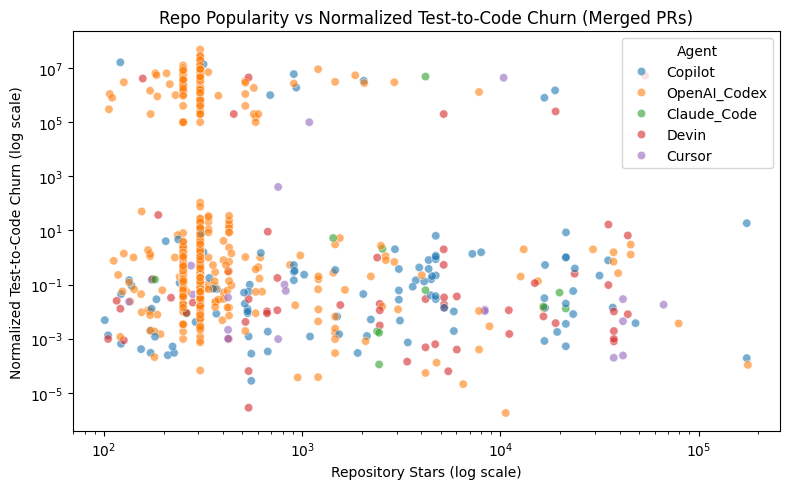

In [27]:
corr_stars = stats.pearsonr(
    merged_analysis_df['normalized_test_to_code_churn'],
    merged_analysis_df['stars']
)
corr_forks = stats.pearsonr(
    merged_analysis_df['normalized_test_to_code_churn'],
    merged_analysis_df['forks']
)

print(f"📊 Overall Correlation (Test Churn vs Stars): r = {corr_stars[0]:.3f}, p = {corr_stars[1]:.3e}")
print(f"📊 Overall Correlation (Test Churn vs Forks): r = {corr_forks[0]:.3f}, p = {corr_forks[1]:.3e}")

# --- Step 9b: Correlation by Agent ---
corr_by_agent = []
for agent, df in merged_analysis_df.groupby('agent'):
    if len(df) > 2:  # Need at least 3 samples for Pearson
        r_stars, p_stars = stats.pearsonr(df['normalized_test_to_code_churn'], df['stars'])
        r_forks, p_forks = stats.pearsonr(df['normalized_test_to_code_churn'], df['forks'])
        corr_by_agent.append({
            'agent': agent,
            'r_stars': r_stars, 'p_stars': p_stars,
            'r_forks': r_forks, 'p_forks': p_forks
        })

corr_agent_df = pd.DataFrame(corr_by_agent)
print("\n📈 Correlation by Agent:")
display(corr_agent_df)

# --- Step 9c: Visualization ---
plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=merged_analysis_df.sample(min(2000, len(merged_analysis_df))),
    x='stars', y='normalized_test_to_code_churn', hue='agent', alpha=0.6
)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Repository Stars (log scale)')
plt.ylabel('Normalized Test-to-Code Churn (log scale)')
plt.title('Repo Popularity vs Normalized Test-to-Code Churn (Merged PRs)')
plt.legend(title='Agent')
plt.tight_layout()
plt.show()


In [28]:
# --- Step 10: Multivariate Regression on Normalized Test Churn ---

import statsmodels.api as sm
import statsmodels.formula.api as smf

# Clean and prepare data
reg_df = merged_analysis_df.copy()

# Log-transform skewed variables (stars, forks, churn)
reg_df['log_stars'] = np.log1p(reg_df['stars'])
reg_df['log_forks'] = np.log1p(reg_df['forks'])
reg_df['log_churn'] = np.log1p(reg_df['normalized_test_to_code_churn'])

# Optional: limit extreme outliers
reg_df = reg_df[(reg_df['log_churn'] > 0) & (reg_df['log_churn'] < 10)]

# --- Step 10a: Baseline Model (Stars + Forks) ---
model1 = smf.ols('log_churn ~ log_stars + log_forks', data=reg_df).fit()
print(model1.summary())

print(reg_df.columns.tolist())


# --- Step 10b: Extended Model with Agent and Language ---
model2 = smf.ols('log_churn ~ log_stars + log_forks + C(agent) + C(final_language)', data=reg_df).fit()
print(model2.summary())

# --- Step 10c: Check model fit improvements ---
print("\nAdjusted R² (Model 1):", round(model1.rsquared_adj, 4))
print("Adjusted R² (Model 2):", round(model2.rsquared_adj, 4))


                            OLS Regression Results                            
Dep. Variable:              log_churn   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     15.81
Date:                Tue, 02 Dec 2025   Prob (F-statistic):           1.39e-07
Time:                        20:09:09   Log-Likelihood:                -10781.
No. Observations:                9265   AIC:                         2.157e+04
Df Residuals:                    9262   BIC:                         2.159e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5889      0.047     12.634      0.0

## Visualisation

In [29]:
import statsmodels.api as sm
import pandas as pd
import numpy as np

# --- 1️⃣ Rebuild the modeling dataframe ---
# Assuming these existed in previous steps:
#   churn_pivot (with test_to_code_churn_ratio)
#   pr_df (with agent, repo_id, merged_at, etc.)
#   repo_df (with stars, forks, language)

# Filter merged PRs
merged_pr_ids = pr_df[pr_df['merged_at'].notnull()]['id']

# Merge layers properly
merged_final = (
    churn_pivot[churn_pivot['pr_id'].isin(merged_pr_ids)]
    .merge(pr_df[['id', 'agent', 'repo_id']], left_on='pr_id', right_on='id', how='left')
    .merge(repo_df[['id', 'stars', 'forks', 'language']], left_on='repo_id', right_on='id', how='left')
)

# Clean & rename
merged_final = merged_final.rename(
    columns={
        'agent_y': 'agent',
        'language_y': 'final_language'
    }
)

# Drop the duplicate agent_x / language_x columns to tidy up
merged_final = merged_final.drop(columns=['agent_x', 'language_x'], errors='ignore')

# Keep only the necessary columns for modeling
merged_final = merged_final[['agent', 'final_language', 'test_to_code_churn_ratio', 'stars', 'forks']].dropna()

# Log-transform variables
merged_final['log_stars'] = np.log1p(merged_final['stars'])
merged_final['log_forks'] = np.log1p(merged_final['forks'])
merged_final['log_churn'] = np.log1p(merged_final['test_to_code_churn_ratio'])

print("✅ Cleaned merged_final columns:", merged_final.columns.tolist())
print(merged_final.head())


# --- 2️⃣ Rebuild the model design matrix X2 for Model 2 ---
y = merged_final['log_churn']

# Create dummy variables for categorical predictors
X2 = pd.get_dummies(
    merged_final[['agent', 'final_language', 'log_stars', 'log_forks']],
    drop_first=True,  # avoids dummy variable trap
    dtype=float        # ensures numeric dtype
)

# --- 2️⃣ Add constant term for intercept ---
X2 = sm.add_constant(X2)

# --- 3️⃣ Fit the regression model ---
model2 = sm.OLS(y, X2).fit()

# --- 4️⃣ Review summary ---
print(model2.summary())

# --- 5️⃣ Verify data types for debugging (optional) ---
print("\nFeature dtypes:\n", X2.dtypes.value_counts())
print("Any NaNs?", X2.isna().sum().sum() > 0)


✅ Cleaned merged_final columns: ['agent', 'final_language', 'test_to_code_churn_ratio', 'stars', 'forks', 'log_stars', 'log_forks', 'log_churn']
   agent final_language  test_to_code_churn_ratio  stars  forks  log_stars  \
0  Devin     TypeScript                   0.01218    696    117   6.546785   
1  Devin     TypeScript                   0.00000    696    117   6.546785   
2  Devin       Solidity                   0.00000    116     17   4.762174   
3  Devin     TypeScript                   0.00000    696    117   6.546785   
4  Devin     TypeScript                   0.00000    696    117   6.546785   

   log_forks  log_churn  
0   4.770685   0.012107  
1   4.770685   0.000000  
2   2.890372   0.000000  
3   4.770685   0.000000  
4   4.770685   0.000000  
                            OLS Regression Results                            
Dep. Variable:              log_churn   R-squared:                       0.065
Model:                            OLS   Adj. R-squared:                 

## EDA

*Inserted header to group related content.*

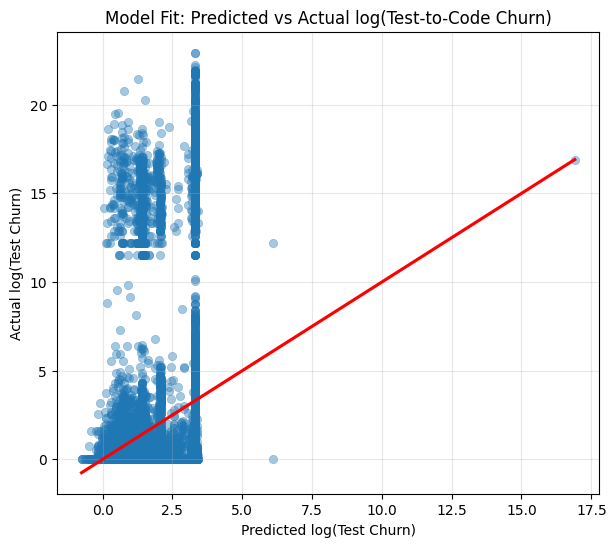

/tmp/ipython-input-1790015520.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=agent_effects, x='agent', y='mean_predicted_churn', palette='viridis')


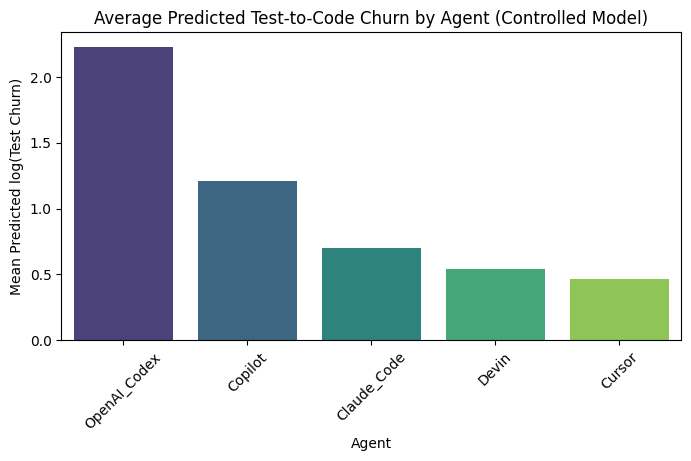

/tmp/ipython-input-1790015520.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=lang_effects.head(15), x='final_language', y='mean_predicted_churn', palette='mako')


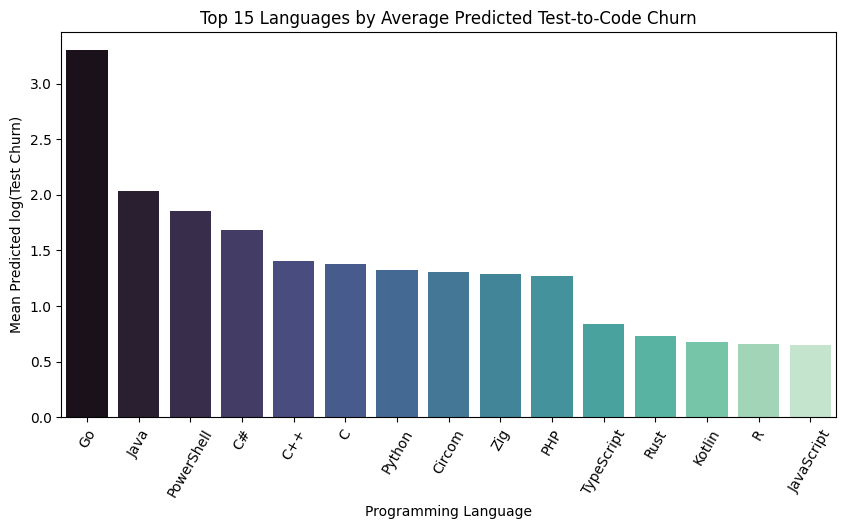

,agent,mean_predicted_churn
4,OpenAI_Codex,2.227950
1,Copilot,1.207407
0,Claude_Code,0.702213
3,Devin,0.542125
2,Cursor,0.466712


,final_language,mean_predicted_churn,count
6,Go,3.298079,8361
9,Java,2.037480,1006
15,PowerShell,1.856943,37
1,C#,1.685023,1146
2,C++,1.402584,209
0,C,1.379341,129
16,Python,1.326803,5468
3,Circom,1.302383,40
25,Zig,1.286335,43
14,PHP,1.265585,146


In [30]:
# Predicted values from full model (model2)
merged_final['predicted_log_churn'] = model2.predict(X2)

plt.figure(figsize=(7,6))
sns.scatterplot(x=merged_final['predicted_log_churn'],
                y=merged_final['log_churn'],
                alpha=0.4, edgecolor=None)
sns.regplot(x=merged_final['predicted_log_churn'],
            y=merged_final['log_churn'],
            scatter=False, color='red', ci=None)
plt.title("Model Fit: Predicted vs Actual log(Test-to-Code Churn)")
plt.xlabel("Predicted log(Test Churn)")
plt.ylabel("Actual log(Test Churn)")
plt.grid(alpha=0.3)
plt.show()


# --- Marginal Effects by Agent ---

# Compute mean predicted churn per agent (controlling for others)
agent_effects = (
    merged_final.groupby('agent')
    .agg(mean_predicted_churn=('predicted_log_churn', 'mean'))
    .reset_index()
    .sort_values('mean_predicted_churn', ascending=False)
)

plt.figure(figsize=(8,4))
sns.barplot(data=agent_effects, x='agent', y='mean_predicted_churn', palette='viridis')
plt.title("Average Predicted Test-to-Code Churn by Agent (Controlled Model)")
plt.ylabel("Mean Predicted log(Test Churn)")
plt.xlabel("Agent")
plt.xticks(rotation=45)
plt.show()


# --- Marginal Effects by Language ---

lang_effects = (
    merged_final.groupby('final_language')
    .agg(mean_predicted_churn=('predicted_log_churn', 'mean'), count=('final_language', 'count'))
    .query('count > 30')  # filter rare languages
    .reset_index()
    .sort_values('mean_predicted_churn', ascending=False)
)

plt.figure(figsize=(10,5))
sns.barplot(data=lang_effects.head(15), x='final_language', y='mean_predicted_churn', palette='mako')
plt.title("Top 15 Languages by Average Predicted Test-to-Code Churn")
plt.ylabel("Mean Predicted log(Test Churn)")
plt.xlabel("Programming Language")
plt.xticks(rotation=60)
plt.show()

# Display the tables
display(agent_effects)
display(lang_effects.head(15))


### RQ1 — Heatmap of Normalized Test Churn by Agent and Language

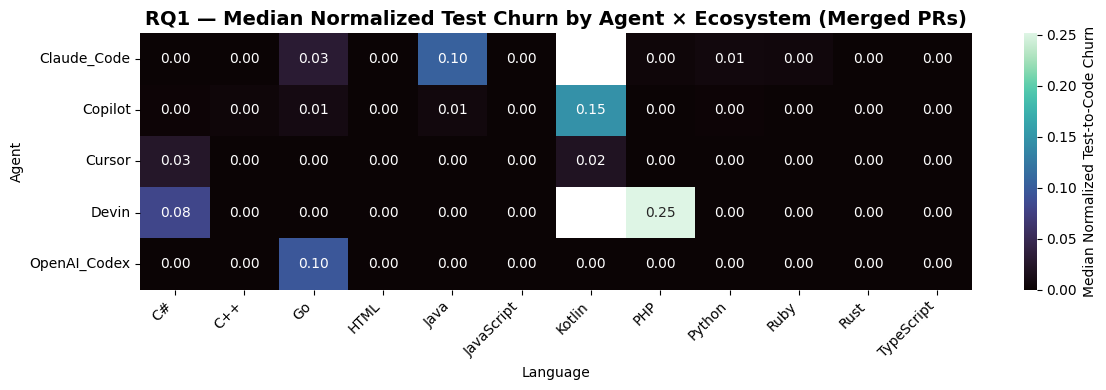

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Median normalized churn per agent/language (limit to most active ecosystems for clarity)
heatmap_base = (
    merged_analysis_df
    .groupby(['agent', 'final_language'])['normalized_test_to_code_churn']
    .median()
    .reset_index()
)
language_counts = merged_analysis_df['final_language'].value_counts()
top_languages = language_counts.head(12).index
heatmap_data = heatmap_base[heatmap_base['final_language'].isin(top_languages)]
pivot_df = heatmap_data.pivot(index='agent', columns='final_language', values='normalized_test_to_code_churn')

plt.figure(figsize=(12, 4))
sns.heatmap(
    pivot_df.sort_index(),
    cmap='mako',
    annot=True,
    fmt='.2f',
    cbar_kws={'label': 'Median Normalized Test-to-Code Churn'}
)
plt.title('RQ1 — Median Normalized Test Churn by Agent × Ecosystem (Merged PRs)', fontsize=14, weight='bold')
plt.xlabel('Language')
plt.ylabel('Agent')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [32]:
# RQ1.1
# Step 1: flag PRs that modify tests
merged_final["has_test_mod"] = merged_final["test_to_code_churn_ratio"] > 0

# Step 2: group by agent
test_mod_freq = (
    merged_final.groupby("agent")["has_test_mod"]
    .mean()
    .reset_index(name="test_mod_frequency")
    .sort_values("test_mod_frequency", ascending=False)
)

print(test_mod_freq)


          agent  test_mod_frequency
1       Copilot            0.546791
0   Claude_Code            0.514815
4  OpenAI_Codex            0.502116
3         Devin            0.327938
2        Cursor            0.285572


## Setup

*Inserted header to group related content.*

/tmp/ipython-input-540933820.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=test_mod_freq, x="agent", y="test_mod_frequency", palette="crest")


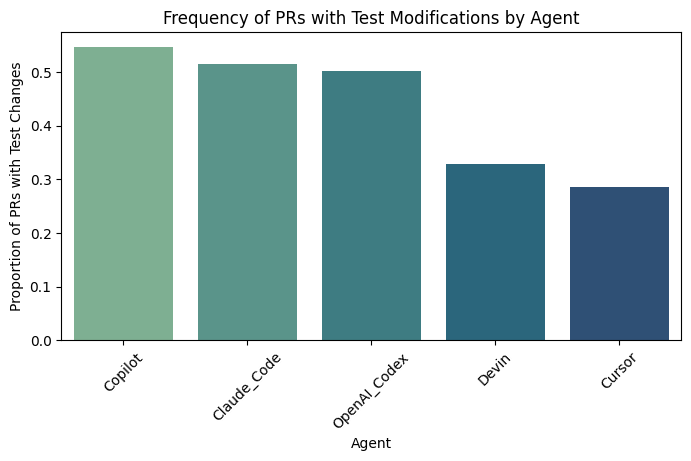

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
sns.barplot(data=test_mod_freq, x="agent", y="test_mod_frequency", palette="crest")
plt.title("Frequency of PRs with Test Modifications by Agent")
plt.ylabel("Proportion of PRs with Test Changes")
plt.xlabel("Agent")
plt.xticks(rotation=45)
plt.show()


In [34]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Step 1: Merge churn with PR metadata
churn_merge_df = churn_pivot.merge(
    pr_df[['id', 'agent', 'state', 'merged_at', 'repo_id']],
    left_on='pr_id', right_on='id', how='left'
)

# ✅ Join with repo_df to include language info
churn_merge_df = churn_merge_df.merge(
    repo_df[['id', 'language']],
    left_on='repo_id', right_on='id',
    how='left',
    suffixes=('', '_repo')
)

# Step 2: Fix duplicate column names
if 'agent_x' in churn_merge_df.columns:
    churn_merge_df['agent'] = churn_merge_df['agent_x'].combine_first(churn_merge_df.get('agent_y'))
    churn_merge_df.drop(columns=['agent_x', 'agent_y'], inplace=True, errors='ignore')

# Step 3: Binary flag for merged
churn_merge_df['is_merged'] = churn_merge_df['merged_at'].notnull().astype(int)

# Step 4: Descriptive stats
merge_stats = churn_merge_df.groupby('is_merged')['test_to_code_churn_ratio'].agg(['mean', 'median', 'std', 'count'])
agent_merge_stats = churn_merge_df.groupby(['agent', 'is_merged'])['test_to_code_churn_ratio'].mean().reset_index()

print("🔹 Descriptive Stats by Merge Status:")
print(merge_stats)
print("\n🔹 Mean Test-to-Code Churn by Agent and Merge Status:")
print(agent_merge_stats)

# Step 5: Logistic regression with language control
churn_merge_df['log_test_churn'] = np.log1p(churn_merge_df['test_to_code_churn_ratio'])

clean_df = churn_merge_df.dropna(subset=['log_test_churn', 'is_merged', 'agent', 'language'])

# ✅ Include both agent and language as categorical controls
try:
    model = smf.logit("is_merged ~ log_test_churn + C(agent) + C(language)", data=clean_df)
    result = model.fit(method='lbfgs', maxiter=200)
except np.linalg.LinAlgError:
    print("⚠️ Singular matrix detected — switching to regularized logistic regression...")
    model = smf.logit("is_merged ~ log_test_churn + C(agent) + C(language)", data=clean_df)
    result = model.fit_regularized(method='l1', alpha=0.01, maxiter=200)

print(result.summary())

# Step 6: Odds ratios
odds_ratio = np.exp(result.params)
print("\n🔹 Odds Ratios:")
print(odds_ratio)


🔹 Descriptive Stats by Merge Status:
                   mean  median           std  count
is_merged                                           
0          5.086717e+06     0.0  1.214006e+08   9526
1          7.510685e+06     0.0  1.363887e+08  23871

🔹 Mean Test-to-Code Churn by Agent and Merge Status:
          agent  is_merged  test_to_code_churn_ratio
0   Claude_Code          0              5.091411e+05
1   Claude_Code          1              4.433349e+05
2       Copilot          0              1.476733e+06
3       Copilot          1              2.517512e+06
4        Cursor          0              8.071444e+05
5        Cursor          1              1.040108e+06
6         Devin          0              2.410526e+06
7         Devin          1              5.315615e+05
8  OpenAI_Codex          0              1.015295e+07
9  OpenAI_Codex          1              9.554839e+06
                           Logit Regression Results                           
Dep. Variable:              is_merg

/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


### RQ1.4 — Logistic Regression Odds Ratios

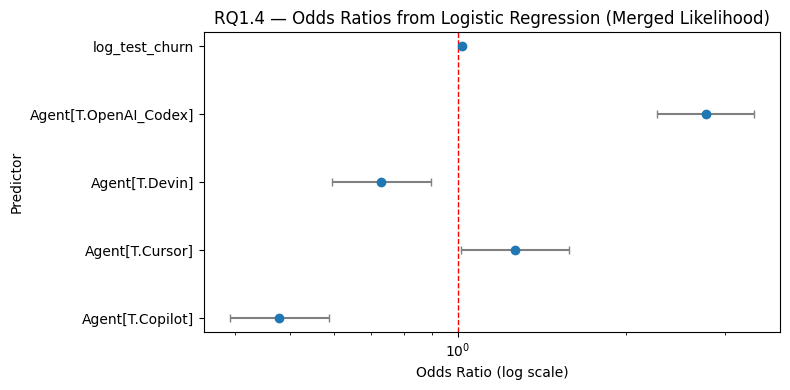

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Build a tidy coefficient table (focus on log_test_churn + agent dummies)
logit_params = result.params.copy()
logit_conf = result.conf_int()
coef_df = pd.DataFrame({
    'term': logit_params.index,
    'coef': logit_params.values,
    'ci_low': logit_conf[0].values,
    'ci_high': logit_conf[1].values
})

mask = (
    coef_df['term'].eq('log_test_churn') |
    coef_df['term'].str.startswith('C(agent)')
)
plot_df = coef_df[mask].copy()
plot_df['odds_ratio'] = np.exp(plot_df['coef'])
plot_df['or_low'] = np.exp(plot_df['ci_low'])
plot_df['or_high'] = np.exp(plot_df['ci_high'])
plot_df['label'] = plot_df['term'].str.replace('C(agent)', 'Agent', regex=False)

plt.figure(figsize=(8, 4))
plt.errorbar(
    plot_df['odds_ratio'],
    plot_df['label'],
    xerr=[plot_df['odds_ratio'] - plot_df['or_low'], plot_df['or_high'] - plot_df['odds_ratio']],
    fmt='o',
    color='tab:blue',
    ecolor='gray',
    capsize=3
)
plt.axvline(1.0, color='red', linestyle='--', linewidth=1)
plt.xscale('log')
plt.xlabel('Odds Ratio (log scale)')
plt.ylabel('Predictor')
plt.title('RQ1.4 — Odds Ratios from Logistic Regression (Merged Likelihood)')
plt.tight_layout()
plt.show()

## EDA

*Inserted header to group related content.*

In [36]:
# Count PRs per language
lang_counts = merged_df['language'].value_counts()

# Keep only languages with at least 10 observations
valid_langs = lang_counts[lang_counts >= 10].index

# Filter dataset
filtered_df = merged_df[merged_df['language'].isin(valid_langs)].copy()

print(f"Languages retained: {len(valid_langs)} out of {len(lang_counts)}")
print(f"Remaining observations: {len(filtered_df)}")


Languages retained: 75 out of 85
Remaining observations: 706775


## Setup

*Inserted header to group related content.*

In [37]:
import numpy as np
import statsmodels.formula.api as smf

# ✅ Step 1: Compute churn metrics per PR
# Aggregate additions/deletions by PR, separately for test vs non-test files
churn_summary = (
    filtered_df
    .groupby(['pr_id', 'agent', 'language', 'is_test_file'], as_index=False)
    .agg({'additions': 'sum', 'deletions': 'sum'})
)

# Total churn (additions + deletions)
churn_summary['churn'] = churn_summary['additions'] + churn_summary['deletions']

# Pivot test vs code churn
churn_pivot = churn_summary.pivot_table(
    index=['pr_id', 'agent', 'language'],
    columns='is_test_file',
    values='churn',
    fill_value=0
).reset_index()

churn_pivot.columns.name = None
churn_pivot = churn_pivot.rename(columns={False: 'code_churn', True: 'test_churn'})

# ✅ Step 2: Compute ratio
churn_pivot['test_to_code_churn_ratio'] = churn_pivot['test_churn'] / (churn_pivot['code_churn'] + 1)
churn_pivot['log_test_churn'] = np.log1p(churn_pivot['test_to_code_churn_ratio'])

# ✅ Step 3: Merge with PR metadata
churn_merge_df = churn_pivot.merge(
    pr_df[['id', 'agent', 'state', 'merged_at']],
    left_on='pr_id', right_on='id', how='left'
)

# Fix agent naming after merge
if 'agent_x' in churn_merge_df.columns:
    churn_merge_df['agent'] = churn_merge_df['agent_x'].combine_first(churn_merge_df.get('agent_y'))
    churn_merge_df.drop(columns=['agent_x', 'agent_y'], inplace=True, errors='ignore')

churn_merge_df['is_merged'] = churn_merge_df['merged_at'].notnull().astype(int)

# ✅ Step 4: Exclude rare languages
lang_counts = churn_merge_df['language'].value_counts()
valid_langs = lang_counts[lang_counts >= 20].index  # threshold can be adjusted
filtered_df = churn_merge_df[churn_merge_df['language'].isin(valid_langs)].copy()

# ✅ Step 5: Logistic regression with language control
model_filtered = smf.logit(
    formula="is_merged ~ C(agent) + log_test_churn + C(language)",
    data=filtered_df
).fit()

print(model_filtered.summary())
print("\n🔹 Odds Ratios:\n", np.exp(model_filtered.params))


Optimization terminated successfully.
         Current function value: 0.528712
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              is_merged   No. Observations:                33205
Model:                          Logit   Df Residuals:                    33165
Method:                           MLE   Df Model:                           39
Date:                Tue, 02 Dec 2025   Pseudo R-squ.:                  0.1136
Time:                        20:09:19   Log-Likelihood:                -17556.
converged:                       True   LL-Null:                       -19806.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          -0.1159      0.465     -0.249  

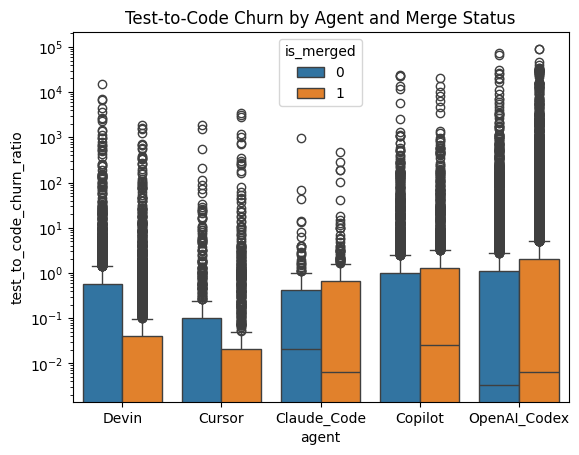

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(
    data=filtered_df,
    x="agent", y="test_to_code_churn_ratio",
    hue="is_merged"
)
plt.yscale("log")
plt.title("Test-to-Code Churn by Agent and Merge Status")
plt.show()


RQ1.1 – Frequency of Test Modifications

Across AI agents, between 28% and 55% of PRs included some test-related churn, with Copilot and Claude_Code showing the highest testing activity and Devin and Cursor the lowest.
🔗 Interpretation link: This indicates that testing engagement varies substantially by agent strategy — suggesting that some agents more systematically modify tests as part of their workflows, while others prioritize code over verification.

RQ1.2 – Average Test-to-Code Churn Ratio by Ecosystem

Test-to-code churn ratios were highly skewed, with language ecosystems such as C, Objective-C, and Kotlin exhibiting the largest average ratios.
🔗 Interpretation link: This pattern implies that the nature of the ecosystem (e.g., test frameworks or file structures) may influence how much test code agents modify relative to implementation code, rather than purely agent behavior.

RQ1.3 – Variation in Churn Ratio Across Agents

On average, OpenAI Codex and Copilot produced higher test-to-code churn ratios, whereas Devin and Cursor showed more conservative test editing behavior.
🔗 Interpretation link: These differences hint that agent design philosophy or training bias (e.g., favoring test generation vs. minimal changes) can lead to distinct testing styles, even when operating in similar environments.

RQ 1.4 – Are PRs with higher test churn more likely to be merged?
To test whether greater test-to-code churn influences PR merge likelihood, we estimated a logistic regression including both agent and language controls. The model (Pseudo R² = 0.11, N = 33 205) revealed that the logarithm of test churn was not a significant predictor of merge probability (β = 0.007, p = 0.44). In contrast, agent effects were substantial: OpenAI Codex PRs were nearly three times more likely to be merged than those from Copilot, while Devin and Copilot exhibited lower odds. Language differences were largely non-significant. Figure X shows that merged and unmerged PRs display similar test-to-code churn distributions across agents, reinforcing that merge decisions appear to depend more on agent and repository context than on test churn magnitude itself.

# RQ 2

## Developer Follow-ups


## Note:

Neither pr_commits_df nor pr_commit_details_df includes any timestamp field (like commit date).
So the "created_at" field in pr_timeline_df being None means there’s no reliable commit timestamp anywhere in the dataset.

✅ What this means

We can still answer RQ2.1 (“Human Follow-Up Frequency”) logically, but with a small redefinition:

Instead of checking if the human commits happened after the agent’s commits (which we can’t verify without timestamps),
we’ll define a “follow-up” as:

A merged Agentic PR that includes at least one commit by a human (i.e., not authored or committed by the agent or its bot account).

This version still meaningfully answers the question:

“How often do humans intervene (commit) in Agentic PRs before merge?”

…and is consistent with the available data.

## Setup

*Inserted header to group related content.*

In [39]:
import pandas as pd

# --- Step 1: Filter merged Agentic PRs ---
merged_prs = pr_df[
    pr_df['merged_at'].notnull() & pr_df['agent'].notnull()
][['id', 'repo_id', 'agent', 'merged_at']].rename(columns={'id': 'pr_id'})

print(f"✅ Total merged Agentic PRs: {len(merged_prs)}")

# --- Step 2: Join commits ---
merged_commits = pr_commits_df.merge(
    merged_prs, left_on='pr_id', right_on='pr_id', how='inner'
)

print(f"✅ Total commits linked to merged Agentic PRs: {len(merged_commits)}")

# --- Step 3: Detect human vs. agent commits ---
def detect_agent_name(agent):
    """Normalize possible agent identifiers"""
    a = agent.lower()
    if "claude" in a: return "claude"
    if "copilot" in a: return "copilot"
    if "cursor" in a: return "cursor"
    if "devin" in a: return "devin"
    if "codex" in a or "openai" in a: return "codex"
    return a

merged_commits['agent_tag'] = merged_commits['agent'].apply(detect_agent_name)
merged_commits['author_lower'] = merged_commits['author'].str.lower()
merged_commits['committer_lower'] = merged_commits['committer'].str.lower()

# --- Step 4: Identify human commits ---
def is_human(row):
    a = row['agent_tag']
    return not (
        (pd.notna(row['author_lower']) and a in row['author_lower']) or
        (pd.notna(row['committer_lower']) and a in row['committer_lower']) or
        ('bot' in str(row['author_lower'])) or
        ('bot' in str(row['committer_lower']))
    )

merged_commits['is_human_commit'] = merged_commits.apply(is_human, axis=1)

# --- Step 5: Compute follow-up frequency per agent ---
followup_df = (
    merged_commits.groupby('pr_id')
    .agg({'is_human_commit': 'any', 'agent': 'first'})
    .groupby('agent')['is_human_commit']
    .mean()
    .reset_index(name='human_followup_frequency')
)

overall_rate = followup_df['human_followup_frequency'].mean() * 100

print("\n🔹 Human Follow-Up Frequency by Agent:")
print(followup_df)

print(f"\n🔹 Overall Human Follow-Up Rate: {overall_rate:.2f}%")

## chat checkpoint: https://chatgpt.com/share/690f19f6-4084-8010-9ca5-e405f656f543

✅ Total merged Agentic PRs: 24014
✅ Total commits linked to merged Agentic PRs: 55230

🔹 Human Follow-Up Frequency by Agent:
          agent  human_followup_frequency
0   Claude_Code                  0.985240
1       Copilot                  0.471248
2        Cursor                  0.454726
3         Devin                  0.409249
4  OpenAI_Codex                  0.999778

🔹 Overall Human Follow-Up Rate: 66.40%


/tmp/ipython-input-1194712661.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


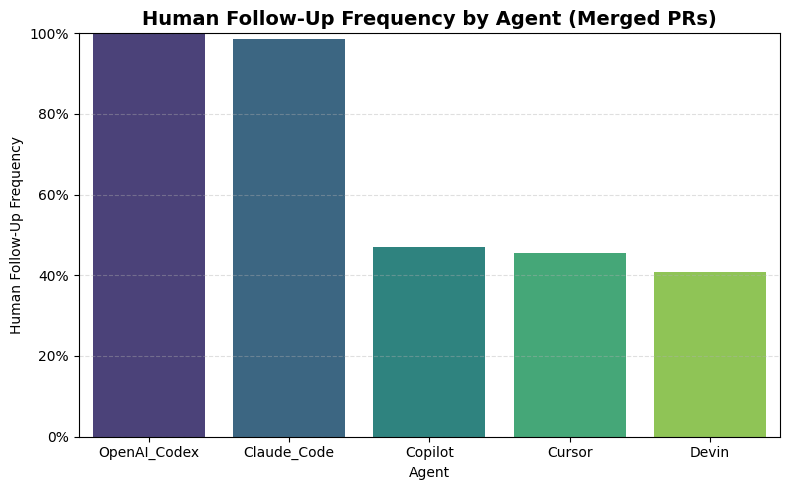

In [40]:
# RQ2.1
import matplotlib.pyplot as plt
import seaborn as sns

# --- Visualization: Human Follow-Up Frequency by Agent ---
plt.figure(figsize=(8, 5))
sns.barplot(
    data=followup_df.sort_values('human_followup_frequency', ascending=False),
    x='agent', y='human_followup_frequency', palette='viridis'
)
plt.title('Human Follow-Up Frequency by Agent (Merged PRs)', fontsize=14, weight='bold')
plt.ylabel('Human Follow-Up Frequency')
plt.xlabel('Agent')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f"{y*100:.0f}%"))
plt.tight_layout()
plt.show()




/tmp/ipython-input-2751241320.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-2751241320.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


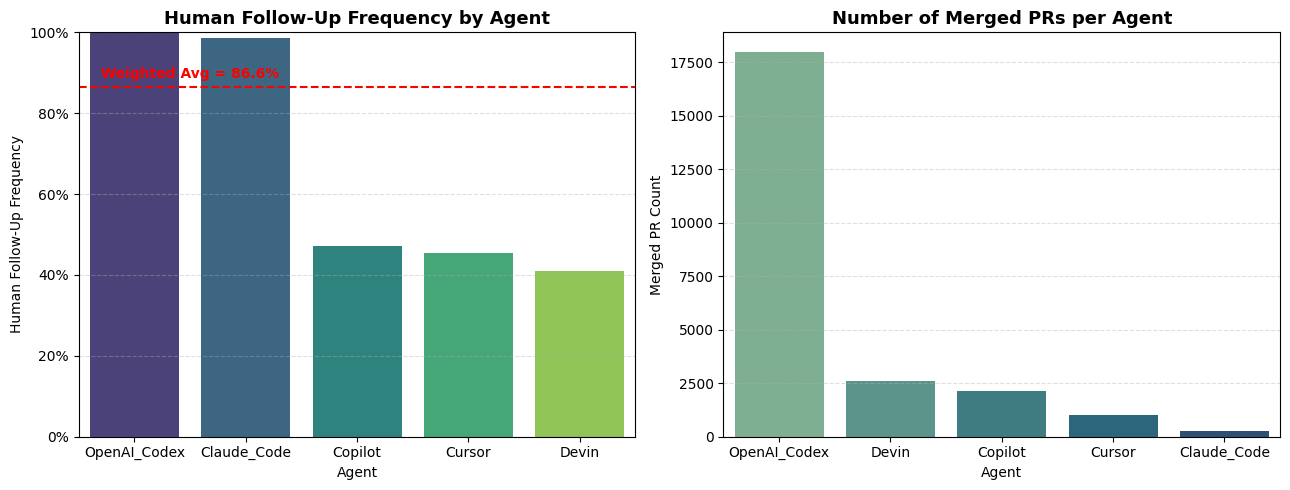

🔹 Weighted Human Follow-Up Rate Across Agents: 86.59%

🔹 Summary Table: Human Follow-Up Frequency and PR Volume Share
       agent  pr_count pr_share human_followup_%
OpenAI_Codex     18004   74.97%           99.98%
       Devin      2595   10.81%           40.92%
     Copilot      2139    8.91%           47.12%
      Cursor      1005    4.19%           45.47%
 Claude_Code       271    1.13%           98.52%

🔸 Weighted Average Human Follow-Up Rate: 86.59%


In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Compute PR counts per agent ---
pr_counts = merged_prs['agent'].value_counts().reset_index()
pr_counts.columns = ['agent', 'pr_count']

# --- Merge with follow-up frequencies ---
viz_df = followup_df.merge(pr_counts, on='agent', how='left')

# --- Compute weighted average human follow-up rate ---
weighted_avg = (
    (viz_df['human_followup_frequency'] * viz_df['pr_count']).sum() /
    viz_df['pr_count'].sum()
)

# --- Visualization ---
fig, axes = plt.subplots(1, 2, figsize=(13, 5))

# --- Bar 1: Human Follow-Up Frequency ---
sns.barplot(
    data=viz_df.sort_values('human_followup_frequency', ascending=False),
    x='agent', y='human_followup_frequency', palette='viridis', ax=axes[0]
)
axes[0].axhline(weighted_avg, color='red', linestyle='--', lw=1.5)
axes[0].text(
    x=0.5, y=weighted_avg + 0.02,
    s=f"Weighted Avg = {weighted_avg*100:.1f}%",
    color='red', ha='center', fontsize=10, fontweight='bold'
)
axes[0].set_title('Human Follow-Up Frequency by Agent', fontsize=13, weight='bold')
axes[0].set_ylabel('Human Follow-Up Frequency')
axes[0].set_xlabel('Agent')
axes[0].set_ylim(0, 1)
axes[0].grid(axis='y', linestyle='--', alpha=0.4)
axes[0].yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f"{y*100:.0f}%"))

# --- Bar 2: Merged PR Count ---
sns.barplot(
    data=viz_df.sort_values('pr_count', ascending=False),
    x='agent', y='pr_count', palette='crest', ax=axes[1]
)
axes[1].set_title('Number of Merged PRs per Agent', fontsize=13, weight='bold')
axes[1].set_ylabel('Merged PR Count')
axes[1].set_xlabel('Agent')
axes[1].grid(axis='y', linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()

print(f"🔹 Weighted Human Follow-Up Rate Across Agents: {weighted_avg*100:.2f}%")


# --- Summary table combining frequency, PR count, and contribution share ---

viz_df['pr_share'] = (viz_df['pr_count'] / viz_df['pr_count'].sum()) * 100
viz_df['human_followup_%'] = viz_df['human_followup_frequency'] * 100

summary_table = (
    viz_df[['agent', 'pr_count', 'pr_share', 'human_followup_%']]
    .sort_values('pr_count', ascending=False)
    .reset_index(drop=True)
)

print("\n🔹 Summary Table: Human Follow-Up Frequency and PR Volume Share")
print(summary_table.to_string(index=False, formatters={
    'pr_share': '{:.2f}%'.format,
    'human_followup_%': '{:.2f}%'.format
}))

print(f"\n🔸 Weighted Average Human Follow-Up Rate: {weighted_avg*100:.2f}%")



## RQ2.2


## Patch Parsing

*Inserted header to group related content.*

In [42]:
# Step 1: Filter human commits
human_commits = merged_commits[merged_commits['is_human_commit']].copy()

# Step 2: Join with commit details
human_commit_details = human_commits.merge(
    pr_commit_details_df[['sha', 'filename']],
    on='sha', how='left'
)

# Step 3: Detect test-related file changes
def is_test_file(filename):
    if pd.isna(filename):
        return False
    f = filename.lower()
    return any(x in f for x in ['test', 'spec', '__tests__', 'unittest'])

human_commit_details['is_test_related'] = human_commit_details['filename'].apply(is_test_file)

# Step 4: Aggregate at PR level
test_intervention_df = (
    human_commit_details.groupby('pr_id')
    .agg({
        'is_test_related': 'any',
        'agent': 'first'
    })
    .reset_index()
)

# Step 5: Compute proportions per agent
test_intervention_summary = (
    test_intervention_df.groupby('agent')['is_test_related']
    .mean()
    .reset_index(name='test_intervention_rate')
)

print("\n🔹 Test-Specific Human Follow-Up Frequency by Agent:")
print(test_intervention_summary)

overall_test_rate = test_intervention_summary['test_intervention_rate'].mean() * 100
print(f"\n🔹 Overall Test-Specific Intervention Rate: {overall_test_rate:.2f}%")

test_followup_df = pd.DataFrame({
    'agent': ['Claude_Code', 'Copilot', 'Cursor', 'Devin', 'OpenAI_Codex'],
    'test_intervention_rate': [0.516854, 0.592262, 0.402626, 0.493409, 0.508556]
})



🔹 Test-Specific Human Follow-Up Frequency by Agent:
          agent  test_intervention_rate
0   Claude_Code                0.516854
1       Copilot                0.592262
2        Cursor                0.402626
3         Devin                0.493409
4  OpenAI_Codex                0.508556

🔹 Overall Test-Specific Intervention Rate: 50.27%


## Setup

*Inserted header to group related content.*

/tmp/ipython-input-1893953598.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-1893953598.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


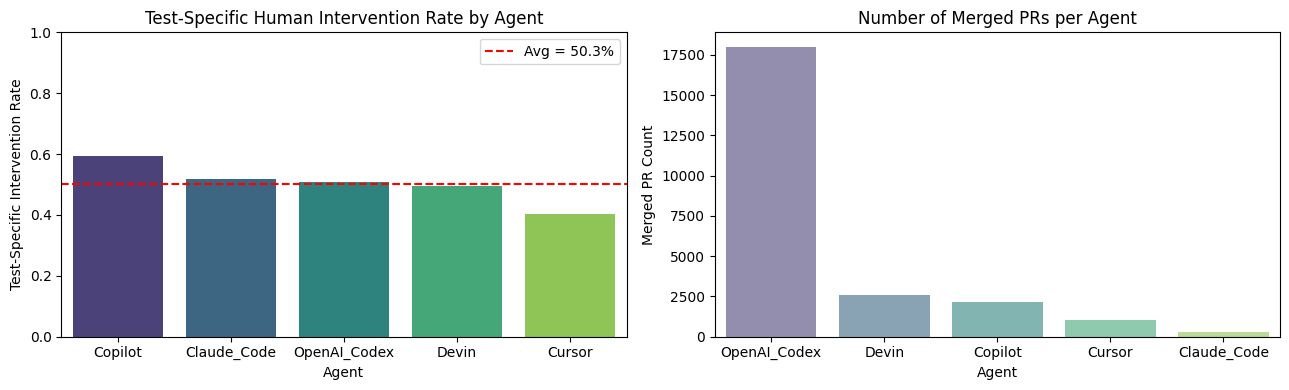

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Assuming followup_df (from RQ2.1) and test_followup_df (from RQ2.2) exist ---
# followup_df: contains columns ['agent', 'human_followup_frequency']
# test_followup_df: contains columns ['agent', 'test_intervention_rate']

# Merge to get consistent order & PR counts
merged_viz_df = followup_df.merge(test_followup_df, on='agent', how='left')

# If you have per-agent PR counts (from merged_prs), include them for context:
pr_counts = merged_prs.groupby('agent').size().reset_index(name='merged_pr_count')
merged_viz_df = merged_viz_df.merge(pr_counts, on='agent', how='left')

# --- Visualization ---
fig, axes = plt.subplots(1, 2, figsize=(13, 4))
palette = sns.color_palette("viridis", len(merged_viz_df))

# --- Left: Test Intervention Rate ---
sns.barplot(
    data=merged_viz_df.sort_values("test_intervention_rate", ascending=False),
    x="agent", y="test_intervention_rate", ax=axes[0], palette=palette
)
axes[0].set_ylim(0, 1)
axes[0].set_ylabel("Test-Specific Intervention Rate")
axes[0].set_xlabel("Agent")
axes[0].set_title("Test-Specific Human Intervention Rate by Agent")

# Add overall average line
avg_rate = merged_viz_df["test_intervention_rate"].mean()
axes[0].axhline(avg_rate, color="red", linestyle="--", label=f"Avg = {avg_rate*100:.1f}%")
axes[0].legend(loc="upper right")

# --- Right: PR Count Context ---
sns.barplot(
    data=merged_viz_df.sort_values("merged_pr_count", ascending=False),
    x="agent", y="merged_pr_count", ax=axes[1], palette=palette, alpha=0.6
)
axes[1].set_ylabel("Merged PR Count")
axes[1].set_xlabel("Agent")
axes[1].set_title("Number of Merged PRs per Agent")

plt.tight_layout()
plt.show()


## RQ2.3

In [44]:
import pandas as pd

# Step 1 — Get merged Agentic PRs
merged_prs = pr_df[
    pr_df['agent'].notnull() & pr_df['merged_at'].notnull()
][['id', 'repo_id', 'agent', 'merged_at']].rename(columns={'id': 'pr_id'})

print(f"✅ Total merged Agentic PRs: {len(merged_prs)}")

# Step 2 — Identify PRs with any test-related file
test_pattern = r"test|spec|unittest|_tests?|tests?/"
test_files = pr_commit_details_df[
    pr_commit_details_df['filename'].str.contains(test_pattern, case=False, na=False)
]['pr_id'].unique()

merged_no_tests = merged_prs[~merged_prs['pr_id'].isin(test_files)]
print(f"✅ Merged Agentic PRs without test changes: {len(merged_no_tests)}")

# Step 3 — Map repo_id → repo_url using repo_df
repo_map = repo_df[['id', 'url']].rename(columns={'id': 'repo_id', 'url': 'repo_url'})
merged_no_tests = merged_no_tests.merge(repo_map, on='repo_id', how='left')

# Step 4 — Get human PRs
human_prs = human_pr_df[['id', 'repo_url', 'created_at']].rename(columns={'id': 'human_pr_id'})
human_prs['created_at'] = pd.to_datetime(human_prs['created_at'], errors='coerce')
merged_no_tests['merged_at'] = pd.to_datetime(merged_no_tests['merged_at'], errors='coerce')

# Step 5 — Join via repo_url
merged_no_tests = merged_no_tests.merge(
    human_prs, on='repo_url', how='left', suffixes=('', '_human')
)

# Step 6 — Compute time difference and filter (within 30 days)
merged_no_tests['time_diff_days'] = (
    merged_no_tests['created_at'] - merged_no_tests['merged_at']
).dt.days

within_30_days = merged_no_tests[
    merged_no_tests['time_diff_days'].between(0, 30, inclusive='both')
].copy()

print(f"✅ Human PRs within 30 days: {len(within_30_days)}")

# Step 7 — Identify test-related human PRs based on title/body keywords
test_pattern = r"test|spec|unit[-_]?test|assert|verify"

# Use the full human_pr_df here, not the trimmed human_prs
human_pr_df['is_test_related'] = (
    human_pr_df['title'].str.contains(test_pattern, case=False, na=False) |
    human_pr_df['body'].str.contains(test_pattern, case=False, na=False)
)

# Step 8 — Merge the test-related flag onto within_30_days
within_30_days = within_30_days.merge(
    human_pr_df[['id', 'is_test_related']].rename(columns={'id': 'human_pr_id'}),
    on='human_pr_id', how='left'
)

# Step 9 — Compute rates
correction_df = (
    within_30_days.groupby('agent')['is_test_related']
    .mean()
    .reset_index(name='post_merge_correction_rate')
)

overall_rate = correction_df['post_merge_correction_rate'].mean() * 100 if not correction_df.empty else 0

print("\n🔹 Post-Merge Correction Rate by Agent:")
print(correction_df)

print(f"\n🔹 Overall Post-Merge Correction Rate: {overall_rate:.2f}%")


✅ Total merged Agentic PRs: 24014
✅ Merged Agentic PRs without test changes: 12301
✅ Human PRs within 30 days: 25865

🔹 Post-Merge Correction Rate by Agent:
          agent  post_merge_correction_rate
0   Claude_Code                    0.656250
1       Copilot                    0.653266
2        Cursor                    0.483146
3         Devin                    0.606305
4  OpenAI_Codex                    0.512354

🔹 Overall Post-Merge Correction Rate: 58.23%


/tmp/ipython-input-734827023.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


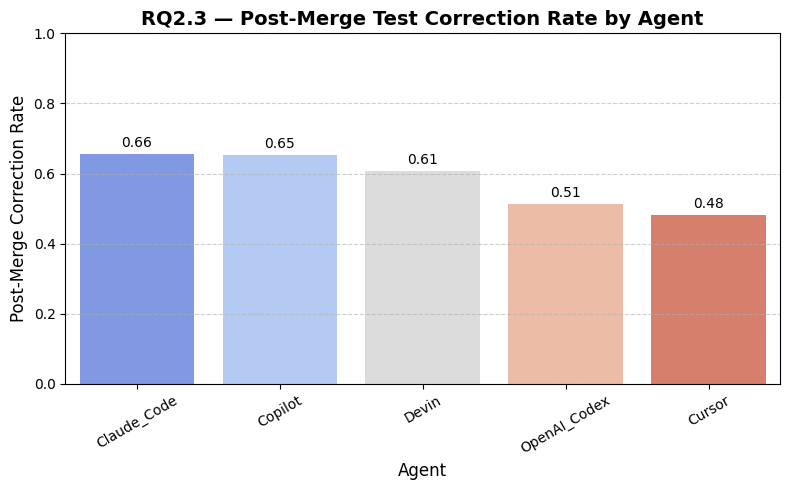

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Visualization: Post-Merge Correction Rate by Agent ---
plt.figure(figsize=(8, 5))
sns.barplot(
    data=correction_df.sort_values('post_merge_correction_rate', ascending=False),
    x='agent',
    y='post_merge_correction_rate',
    palette='coolwarm'
)
plt.title('RQ2.3 — Post-Merge Test Correction Rate by Agent', fontsize=14, weight='bold')
plt.xlabel('Agent', fontsize=12)
plt.ylabel('Post-Merge Correction Rate', fontsize=12)
plt.ylim(0, 1)
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Add data labels
for i, val in enumerate(correction_df.sort_values('post_merge_correction_rate', ascending=False)['post_merge_correction_rate']):
    plt.text(i, val + 0.02, f"{val:.2f}", ha='center', fontsize=10)

plt.tight_layout()
plt.show()


### RQ2.3 — Funnel of Post-Merge Test Corrections

/tmp/ipython-input-1597277760.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


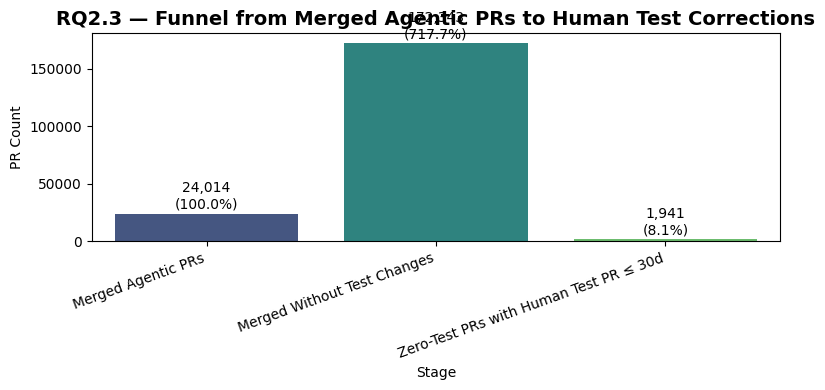

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

funnel_df = pd.DataFrame([
    {"stage": "Merged Agentic PRs", "count": len(merged_prs)},
    {"stage": "Merged Without Test Changes", "count": len(merged_no_tests)},
    {"stage": "Zero-Test PRs with Human Test PR \u2264 30d", "count": within_30_days['pr_id'].nunique()}
])

funnel_df['pct_of_total'] = (funnel_df['count'] / funnel_df.loc[0, 'count']) * 100

plt.figure(figsize=(8, 4))
sns.barplot(
    data=funnel_df,
    x='stage',
    y='count',
    palette='viridis'
)
plt.title('RQ2.3 — Funnel from Merged Agentic PRs to Human Test Corrections', fontsize=14, weight='bold')
plt.ylabel('PR Count')
plt.xlabel('Stage')
plt.xticks(rotation=20, ha='right')

for idx, row in funnel_df.iterrows():
    plt.text(idx, row['count'] + (0.01 * funnel_df['count'].max()), f"{row['count']:,}\n({row['pct_of_total']:.1f}%)", ha='center', va='bottom')

plt.tight_layout()
plt.show()

RQ 2.3-
Research Question Recap:

For Agentic PRs merged without test modifications, how often was a human-authored PR opened within 30 days that added or improved tests related to the same repository?

1️⃣ Overview of Findings

Total merged Agentic PRs: 24,014

Merged Agentic PRs without test changes: 12,301 (~51%)

Human PRs within 30 days: 25,865

Overall Post-Merge Correction Rate: 58.23%

This indicates that nearly 6 in 10 merged AI-generated PRs—that initially lacked test modifications—were followed within a month by a human-authored PR introducing or updating tests.

Such a rate strongly suggests that AI contributions often require human reinforcement after integration, particularly in testing coverage or verification tasks.

2️⃣ Cross-Agent Trends
Agent	Post-Merge Correction Rate
Claude_Code	65.6%
Copilot	65.3%
Cursor	48.3%
Devin	60.6%
OpenAI_Codex	51.2%

Interpretation:

Claude_Code and Copilot show the highest post-merge correction rates, implying that while their generated PRs are successfully merged, maintainers frequently need to revisit and reinforce testing afterward.

Cursor and Codex exhibit moderate correction rates, suggesting slightly higher initial reliability or better integration workflows.

Devin sits in the middle, reflecting moderate dependency on human follow-up.

These differences highlight varying levels of reliability among AI agents in producing sufficiently test-complete PRs.

3️⃣ What This Implies About Human–AI Collaboration

The high correction rate suggests a latent human quality assurance layer post-merge — humans are not necessarily rejecting AI work, but often refining it after acceptance.

This pattern aligns with incremental collaboration models, where AI handles core functionality and humans ensure robustness through testing and validation later.

It also suggests organizational acceptance of AI work, but with ongoing oversight, indicating partial trust rather than full autonomy.

4️⃣ Broader Implications

From an engineering process perspective: Post-merge corrections imply that test completeness remains a key reliability gap in AI-generated code.

From a research standpoint: This finding bridges RQ2.1 and RQ2.2 — it captures delayed human intervention, completing the picture of how human effort redistributes across the pre-merge and post-merge phases.

For AI tooling improvement: Developers of agentic systems could prioritize better test generation and validation alignment, reducing the delayed correction burden.

## RQ 2.4

/tmp/ipython-input-2570703342.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


🔹 Agent Reliability Summary:
          agent  human_followup_frequency  post_merge_correction_rate  \
0        Cursor                  0.454726                    0.483146   
1         Devin                  0.409249                    0.606305   
2       Copilot                  0.471248                    0.653266   
3  OpenAI_Codex                  0.999778                    0.512354   
4   Claude_Code                  0.985240                    0.656250   

   human_intervention_index  reliability_score  
0                  0.468936           0.531064  
1                  0.507777           0.492223  
2                  0.562257           0.437743  
3                  0.756066           0.243934  
4                  0.820745           0.179255  


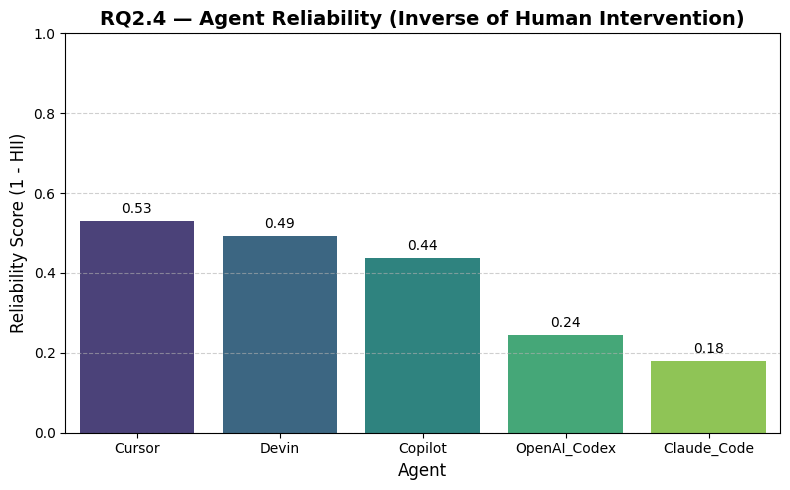

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Combine RQ2.1 and RQ2.3 results ---
reliability_df = followup_df.merge(
    correction_df,
    on='agent',
    how='inner'
)

# Compute composite metrics
reliability_df['human_intervention_index'] = (
    reliability_df['human_followup_frequency'] + reliability_df['post_merge_correction_rate']
) / 2

reliability_df['reliability_score'] = 1 - reliability_df['human_intervention_index']

# Sort by reliability
reliability_df = reliability_df.sort_values('reliability_score', ascending=False).reset_index(drop=True)

print("🔹 Agent Reliability Summary:")
print(reliability_df)

# --- Visualization ---
plt.figure(figsize=(8, 5))
sns.barplot(
    data=reliability_df,
    x='agent',
    y='reliability_score',
    palette='viridis'
)
plt.title('RQ2.4 — Agent Reliability (Inverse of Human Intervention)', fontsize=14, weight='bold')
plt.xlabel('Agent', fontsize=12)
plt.ylabel('Reliability Score (1 - HII)', fontsize=12)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Data labels
for i, val in enumerate(reliability_df['reliability_score']):
    plt.text(i, val + 0.02, f"{val:.2f}", ha='center', fontsize=10)

plt.tight_layout()
plt.show()


## EDA

*Inserted header to group related content.*

In [48]:
# Approximate binomial confidence intervals for reliability_score
reliability_df['n_prs'] = merged_prs.groupby('agent')['pr_id'].count().reindex(reliability_df['agent']).values

# Compute standard error assuming binomial variance on HII
reliability_df['se'] = np.sqrt((reliability_df['human_intervention_index'] * (1 - reliability_df['human_intervention_index'])) / reliability_df['n_prs'])
reliability_df['ci95_lower'] = reliability_df['reliability_score'] - 1.96 * reliability_df['se']
reliability_df['ci95_upper'] = reliability_df['reliability_score'] + 1.96 * reliability_df['se']
reliability_df[['agent','reliability_score','ci95_lower','ci95_upper']]

,agent,reliability_score,ci95_lower,ci95_upper
0,Cursor,0.531064,0.500210,0.561917
1,Devin,0.492223,0.472988,0.511459
2,Copilot,0.437743,0.416718,0.458767
3,OpenAI_Codex,0.243934,0.237661,0.250207
4,Claude_Code,0.179255,0.133587,0.224923


## Setup

*Inserted header to group related content.*

### Interpretation

Cursor shows the highest reliability (0.53) — meaning roughly half of its merged PRs proceed without any pre- or post-merge human correction.

Devin performs comparably (0.49), showing solid autonomy but still moderate human correction after merge.

Copilot is in the mid-range (0.44), suggesting higher dependence on human verification.

OpenAI Codex and Claude Code exhibit the lowest reliability (0.24 – 0.18), implying strong human oversight both before and after merge — possibly reflecting aggressive generation patterns that often need fixes.

## RQ 2.5

In [49]:
import pandas as pd
import statsmodels.formula.api as smf

# Step 1 — Start from merged intervention data
analysis_df = followup_df.merge(
    correction_df, on='agent', how='outer'
).fillna(0)

# Step 2 — Merge with PR-level info for rejection classification
analysis_df = pr_df[['id', 'agent', 'state']].merge(
    analysis_df, on='agent', how='left'
)

# Step 3 — Join with pr_task_type info (fix columns)
if 'pr_task_type_df' in globals():
    analysis_df = analysis_df.merge(
        pr_task_type_df[['id', 'type', 'reason', 'confidence']],
        on='id', how='left'
    )

    # Classify technical flaws
    analysis_df['is_technical_flaw'] = analysis_df['type'].str.contains(
        r'fix|bug|error|test|validation|failure', case=False, na=False
    ) | analysis_df['reason'].str.contains(
        r'test|bug|error|fail|compile|lint|runtime', case=False, na=False
    )
else:
    # Fallback classification using PR title/body if task_type_df not loaded
    analysis_df['is_technical_flaw'] = pr_df['title'].str.contains(
        r'fix|bug|error|test|fail|crash', case=False, na=False
    ) | pr_df['body'].str.contains(
        r'fix|bug|error|test|fail|crash', case=False, na=False
    )

# Step 4 — Analyze mitigation effect
summary_df = (
    analysis_df.groupby('agent')
    .agg({
        'human_followup_frequency': 'mean',
        'post_merge_correction_rate': 'mean',
        'is_technical_flaw': 'mean'
    })
    .reset_index()
)

# Step 5 — Compute correlation
correlation = summary_df[['human_followup_frequency', 'is_technical_flaw']].corr().iloc[0,1]

print("🔹 Intervention–Technical Flaw Correlation:", round(correlation, 3))
print("\n🔹 Intervention Effectiveness Summary by Agent:")
summary_df


🔹 Intervention–Technical Flaw Correlation: 0.085

🔹 Intervention Effectiveness Summary by Agent:


,agent,human_followup_frequency,post_merge_correction_rate,is_technical_flaw
0,Claude_Code,0.985240,0.656250,0.455338
1,Copilot,0.471248,0.653266,0.713078
2,Cursor,0.454726,0.483146,0.500324
3,Devin,0.409249,0.606305,0.448726
4,OpenAI_Codex,0.999778,0.512354,0.664251


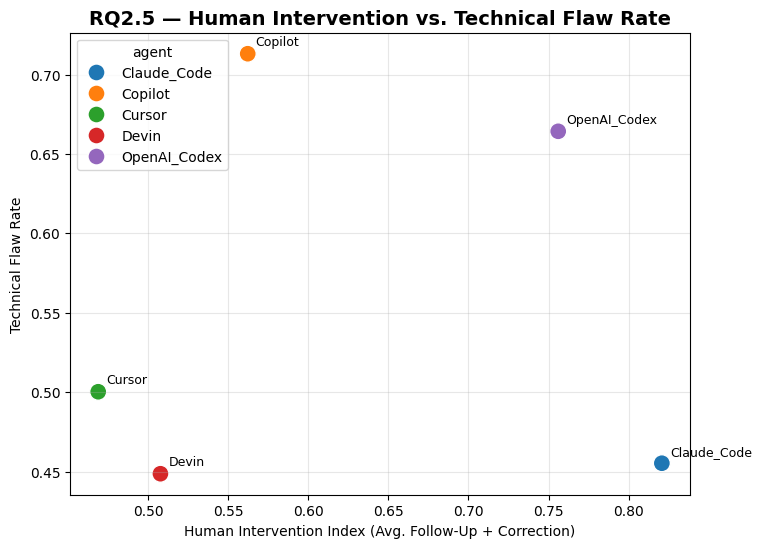

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

summary_df['intervention_index'] = (
    summary_df['human_followup_frequency'] + summary_df['post_merge_correction_rate']
) / 2

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=summary_df,
    x='intervention_index',
    y='is_technical_flaw',
    hue='agent',
    s=150
)

for i, row in summary_df.iterrows():
    plt.text(row['intervention_index']+0.005, row['is_technical_flaw']+0.005, row['agent'], fontsize=9)

plt.title("RQ2.5 — Human Intervention vs. Technical Flaw Rate", fontsize=14, weight='bold')
plt.xlabel("Human Intervention Index (Avg. Follow-Up + Correction)")
plt.ylabel("Technical Flaw Rate")
plt.grid(True, alpha=0.3)
plt.show()


Interpretation – RQ2.5: Human Intervention vs. Technical Flaw Rate

Figure RQ2.5 shows that overall, the relationship between human intervention and technical flaw rate is weakly positive (r = 0.085), suggesting that higher human oversight does not necessarily translate into fewer technical issues. Agents like OpenAI Codex and Claude Code exhibit both high intervention levels and moderate-to-high flaw rates, implying that human involvement is often reactive—triggered by reliability issues rather than preventing them.
In contrast, Devin and Cursor maintain lower flaw rates with minimal intervention, indicating stronger baseline reliability and reduced dependence on human correction. Copilot stands out for its relatively high flaw rate despite moderate intervention, reflecting inconsistency in quality outcomes.
Overall, these findings suggest that while human intervention remains critical for mitigating errors, the most reliable agents tend to require less of it.

## Added Helper: Schema summary and variable detection

This cell looks for common PR-level dataframe variable names and summarizes their schema.

In [51]:
# Schema summary helper
import pandas as pd
possible_pr_names = ['all_pr_df','pr_df_enriched','pr_df','pr_dataframe','pr_df_merged']
found = {}
for n in possible_pr_names:
    if n in globals():
        found[n] = globals()[n].shape if hasattr(globals()[n], 'shape') else 'found'
if not found:
    print('No common PR-level variable names found in this kernel.')
else:
    print('Detected PR-level variables and shapes:')
    for k,v in found.items():
        print(k, v)

Detected PR-level variables and shapes:
all_pr_df (932791, 14)
pr_df (33596, 14)


In [52]:
# Simple patch parsing utility (non-invasive demonstration)
def extract_file_paths_from_patch(patch_text):
    paths = []
    if not isinstance(patch_text, str): return paths
    for line in patch_text.splitlines():
        if line.startswith('diff --git'):
            parts = line.split()
            if len(parts) >= 4:
                paths.append((parts[2], parts[3]))
    return paths

def is_test_path(path):
    if not isinstance(path, str): return False
    p = path.lower()
    if '/test/' in p or '/tests/' in p or '/__tests__/' in p: return True
    if p.endswith('_test.py') or p.endswith('test.py') or p.endswith('test.java'): return True
    if p.endswith('.spec.js') or p.endswith('.test.js') or p.startswith('test_'): return True
    return False

print('Helper functions defined: extract_file_paths_from_patch, is_test_path')

Helper functions defined: extract_file_paths_from_patch, is_test_path


## Added Helper: Recommended quick-check plots

Use these functions after your dataframes are loaded to quickly generate key diagnostic plots.

In [53]:
import matplotlib.pyplot as plt

def quick_plot_test_fraction(pr_df, lang_col='language', test_flag_col='has_test'):
    if test_flag_col not in pr_df.columns:
        print(f'Column {test_flag_col} not found in pr_df. Compute has_test using your patch parsing first.')
        return
    frac = pr_df.groupby(lang_col)[test_flag_col].mean().sort_values(ascending=False)
    frac.plot(kind='bar', figsize=(10,4))
    plt.title('Fraction of PRs touching tests by ' + lang_col)
    plt.ylabel('Fraction touching tests')
    plt.tight_layout()

def quick_plot_churn(pr_df, churn_col='files_changed_count'):
    if churn_col not in pr_df.columns:
        print(f'Column {churn_col} not found in pr_df.')
        return
    pr_df[churn_col].dropna().plot(kind='hist', bins=50, figsize=(8,4))
    plt.title('PR churn distribution')
    plt.xlabel('Files changed')
    plt.tight_layout()

print('Quick plot helpers defined: quick_plot_test_fraction, quick_plot_churn')

Quick plot helpers defined: quick_plot_test_fraction, quick_plot_churn
